# 1 Dependencies and Imports

## 1.1 Check for GPU availability

In [1]:
!nvidia-smi

Sun Mar 23 06:27:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1.2 Install dependencies

In [ ]:
!pip install -U ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## 1.3 Import libraries

In [ ]:
import matplotlib.pyplot as plt

from IPython.display import Image
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 2 Load Dataset

In [ ]:
rf = Roboflow(api_key="xxx")
project = rf.workspace("csc3101bloobin").project("csc3101_bloobin_dataset")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CSC3101_Bloobin_Dataset-3 in yolov11:: 100%|██████████| 3414/3414 [00:00<00:00, 7537.55it/s]


# 3 Model Training

In [ ]:
model = YOLO("yolo11s-seg.pt")

train_result = model.train(
    data="/content/CSC3101_Bloobin_Dataset-3/data.yaml",
    epochs=70,
    imgsz=640,
    batch=16,
    device=0,
    save=True,
    save_period=10,
    cache=True,
    plots=True,
    val=True
)

100%|██████████| 19.7M/19.7M [00:00<00:00, 154MB/s] 


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/CSC3101_Bloobin_Dataset-3/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=True, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]


Overriding model.yaml nc=80 with nc=14

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.2MB/s]


AMP: checks passed ✅


train: Scanning /content/CSC3101_Bloobin_Dataset-3/train/labels... 1564 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1564/1564 [00:01<00:00, 1155.74it/s]

train: WARNING ⚠️ /content/CSC3101_Bloobin_Dataset-3/train/images/cardboard70_jpeg.rf.6ee5ac23a465fad27442477d661f5b45.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/CSC3101_Bloobin_Dataset-3/train/images/cardboard70_jpeg.rf.dd83e6bc1591be396c78e3d0a9189d19.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/CSC3101_Bloobin_Dataset-3/train/images/cardboard70_jpeg.rf.e21b2ef61b02c53fc34e06f2e4149748.jpg: 1 duplicate labels removed


train: New cache created: /content/CSC3101_Bloobin_Dataset-3/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.2GB RAM): 100%|██████████| 1564/1564 [00:02<00:00, 542.11it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/CSC3101_Bloobin_Dataset-3/valid/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 633.04it/s]

val: New cache created: /content/CSC3101_Bloobin_Dataset-3/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 70/70 [00:00<00:00, 140.30it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/70      5.05G     0.8519      2.015       2.33      1.167         82        640: 100%|██████████| 98/98 [00:52<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         70        472      0.507      0.373      0.376      0.307      0.469      0.335      0.349       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/70      6.44G     0.7731      1.674      1.183      1.082         86        640: 100%|██████████| 98/98 [00:50<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         70        472      0.759      0.332      0.415      0.333      0.709      0.312      0.362      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/70      6.48G     0.7957      1.665      1.078      1.075        114        640: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         70        472       0.58      0.412      0.319      0.221      0.569      0.359      0.293      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/70      6.52G     0.7565      1.588     0.9843      1.057         68        640: 100%|██████████| 98/98 [00:46<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         70        472      0.542      0.357       0.39      0.296      0.486      0.306      0.342      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/70      6.56G     0.7274       1.46     0.8659      1.037         96        640: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         70        472      0.561      0.438      0.453      0.355      0.552      0.412      0.431      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/70      6.61G     0.7103      1.441      0.831       1.03        114        640: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         70        472      0.646      0.437       0.51      0.376      0.609      0.405      0.441       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/70      6.65G     0.6657       1.36     0.7732      1.009         81        640: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         70        472      0.653      0.415      0.485      0.368      0.618       0.39      0.436      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/70       6.7G     0.6431       1.33     0.7358     0.9938        114        640: 100%|██████████| 98/98 [00:46<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         70        472      0.636      0.422      0.475       0.36      0.617      0.412      0.442      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/70      6.74G     0.6367      1.298     0.7104     0.9928         93        640: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         70        472      0.695      0.437      0.522      0.424      0.724      0.405      0.495      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/70      6.78G     0.6019      1.244     0.6748     0.9774        137        640: 100%|██████████| 98/98 [00:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


                   all         70        472      0.758      0.442      0.512      0.408      0.739      0.407      0.471      0.353

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/70      6.83G     0.5907      1.217     0.6369      0.969        100        640: 100%|██████████| 98/98 [00:48<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         70        472      0.762      0.429      0.509      0.402       0.76      0.378       0.46      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/70      6.87G     0.5829      1.146      0.599     0.9617         97        640: 100%|██████████| 98/98 [00:48<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         70        472      0.564       0.52      0.501      0.401      0.424      0.482      0.445      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/70      6.91G     0.5723      1.158     0.6133     0.9617        132        640: 100%|██████████| 98/98 [00:47<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         70        472      0.503      0.474      0.521      0.434      0.445      0.451      0.473      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/70      6.96G      0.562      1.137     0.5826     0.9564         95        640: 100%|██████████| 98/98 [00:47<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         70        472      0.744      0.469       0.51      0.374      0.658      0.439       0.45      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/70         7G     0.5484      1.105     0.5644     0.9496        113        640: 100%|██████████| 98/98 [00:48<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         70        472      0.712       0.45      0.557      0.455      0.678      0.438       0.52      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/70      7.04G     0.5422      1.039     0.5409     0.9438         96        640: 100%|██████████| 98/98 [00:47<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         70        472      0.812      0.459      0.601      0.487      0.735      0.451      0.582      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/70      7.09G     0.5388      1.061     0.5331     0.9439         99        640: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         70        472      0.634      0.587      0.561      0.439      0.567      0.531      0.488      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/70      7.13G     0.5344      1.068     0.5431     0.9412         97        640: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         70        472      0.617      0.484      0.629      0.512      0.615      0.483      0.592      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/70      7.17G     0.5183      1.032     0.5113     0.9349        120        640: 100%|██████████| 98/98 [00:45<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         70        472      0.628      0.519      0.549      0.441      0.598      0.486      0.499      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/70      7.22G     0.5205      1.023     0.5047     0.9334         81        640: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         70        472      0.533      0.604      0.564      0.427      0.468      0.534      0.472      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/70      7.26G     0.5171      1.005     0.5025       0.93         80        640: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         70        472      0.756      0.501      0.587      0.486       0.69      0.449      0.541      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/70       7.3G     0.5085      1.003     0.4985      0.931         98        640: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         70        472      0.787      0.522      0.602      0.496      0.751      0.523      0.569      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/70      7.35G     0.5014     0.9854     0.4722     0.9261         88        640: 100%|██████████| 98/98 [00:45<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         70        472      0.576      0.543      0.596        0.5      0.614      0.465      0.555      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/70      7.39G     0.4775      0.914     0.4502      0.921         77        640: 100%|██████████| 98/98 [00:45<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         70        472      0.757      0.505        0.6      0.494      0.687      0.493      0.564      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/70      7.43G     0.4859     0.9443     0.4563     0.9184         84        640: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         70        472      0.718      0.511       0.62       0.51      0.708      0.528      0.619      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/70      7.48G     0.4762     0.9225      0.444     0.9151         84        640: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         70        472      0.699      0.573      0.659      0.545      0.674      0.543      0.621      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/70      7.52G     0.4802     0.9203     0.4482     0.9173        110        640: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         70        472      0.804      0.514      0.679      0.579      0.736      0.483      0.634      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/70      7.56G     0.4647     0.8778     0.4272     0.9099        111        640: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         70        472      0.765      0.533      0.689      0.583      0.743      0.521      0.672      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/70      7.61G     0.4534     0.8625     0.4079     0.9098        133        640: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         70        472      0.784       0.57      0.625      0.528      0.758      0.545      0.587      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/70      7.65G     0.4664     0.8992      0.431     0.9122        105        640: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         70        472      0.815      0.506      0.671      0.572      0.775      0.484      0.646        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/70       7.7G     0.4512     0.8853      0.417     0.9031        121        640: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]


                   all         70        472      0.771      0.508      0.608       0.52      0.695      0.465      0.557      0.455

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/70      7.74G     0.4505     0.8663      0.413     0.9102         82        640: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         70        472      0.701      0.551      0.654      0.555      0.763      0.516      0.594      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/70      7.78G     0.4432     0.8589     0.4059     0.9028        168        640: 100%|██████████| 98/98 [00:46<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         70        472      0.822      0.549       0.73      0.618      0.788      0.515      0.675      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/70      7.83G     0.4364     0.8319      0.393     0.8981         80        640: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         70        472      0.828      0.571       0.74      0.626      0.815      0.557       0.69      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/70      7.87G     0.4351     0.8225     0.3938     0.8985        104        640: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         70        472      0.695      0.574      0.707      0.609      0.689      0.548      0.681      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/70      7.91G     0.4304     0.8134     0.3852     0.8958        116        640: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         70        472      0.815      0.552      0.721      0.628      0.815      0.547      0.704      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/70      7.96G     0.4242      0.806     0.3694     0.8963         97        640: 100%|██████████| 98/98 [00:44<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         70        472      0.772      0.558      0.725      0.622      0.718      0.537      0.677      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/70         8G     0.4147     0.7686     0.3671     0.8927         84        640: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         70        472      0.739      0.564      0.721       0.63      0.718       0.54      0.702      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/70      8.04G     0.4161     0.7744     0.3611     0.8874         93        640: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         70        472      0.852      0.504      0.679      0.584       0.82      0.488      0.653      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/70      8.09G     0.4102     0.7506     0.3556      0.889         79        640: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         70        472      0.831      0.527      0.657      0.553      0.794      0.504      0.619      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/70      8.13G     0.4127      0.793     0.3546     0.8865        158        640: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         70        472      0.649      0.631      0.667      0.543      0.679       0.58      0.613      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/70      8.17G     0.4077     0.7622      0.351     0.8945        112        640: 100%|██████████| 98/98 [00:45<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         70        472      0.689      0.595      0.682      0.584      0.651      0.565      0.648      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/70      8.22G     0.4068      0.748     0.3517     0.8844         81        640: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         70        472      0.793      0.628      0.732      0.615      0.701      0.581      0.671      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/70      8.26G     0.4019     0.7568     0.3488     0.8833        144        640: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         70        472      0.669      0.623      0.678      0.564      0.764      0.544      0.637      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/70       8.3G     0.3973     0.7417     0.3375     0.8816         75        640: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         70        472       0.68      0.562      0.703        0.6      0.676      0.493      0.658      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/70      8.35G     0.4024       0.74     0.3349      0.883        105        640: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         70        472      0.738      0.613      0.751      0.637       0.73      0.587      0.702      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/70      8.39G     0.3923     0.7168     0.3292     0.8769        136        640: 100%|██████████| 98/98 [00:47<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         70        472      0.764      0.609      0.727      0.607      0.712      0.558      0.675      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/70      8.43G     0.3857     0.6976     0.3199     0.8769         99        640: 100%|██████████| 98/98 [00:48<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         70        472      0.709      0.597      0.681      0.585      0.687      0.571      0.644      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/70      8.48G     0.3851     0.7104     0.3175     0.8756         72        640: 100%|██████████| 98/98 [00:46<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         70        472      0.775      0.595      0.736       0.64      0.826      0.553      0.702      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/70      8.52G     0.3807     0.7187     0.3262     0.8744         76        640: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         70        472      0.736      0.557      0.665      0.581      0.722      0.547      0.643      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/70      8.56G     0.3701     0.6852     0.3109     0.8736        121        640: 100%|██████████| 98/98 [00:45<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         70        472      0.685      0.602      0.738      0.641      0.776       0.56      0.714      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/70      8.61G     0.3749     0.6925     0.3173      0.879        102        640: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         70        472      0.561      0.685      0.709      0.627      0.542      0.666      0.671      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/70      8.65G     0.3665     0.6662     0.2978     0.8687        165        640: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         70        472      0.542      0.741      0.712      0.635      0.513        0.7      0.669      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/70       8.7G     0.3713     0.6713      0.302     0.8718         83        640: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         70        472      0.862       0.58      0.738      0.648      0.797      0.551      0.699      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/70      8.74G     0.3545     0.6746     0.2934      0.871        129        640: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         70        472      0.669        0.7      0.722      0.646      0.652      0.693      0.691      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/70      8.78G     0.3573     0.6462     0.2915     0.8677        128        640: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         70        472       0.62      0.746      0.729      0.647      0.603      0.725      0.708      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/70      8.83G     0.3643     0.6592     0.2915      0.872        124        640: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         70        472      0.634      0.706      0.716      0.637      0.645      0.693      0.679      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/70      8.87G     0.3553     0.6509     0.2882     0.8695        108        640: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         70        472       0.86      0.546      0.735      0.646      0.787      0.522      0.695      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/70      8.91G      0.343     0.6218     0.2779     0.8634         96        640: 100%|██████████| 98/98 [00:45<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         70        472      0.626      0.715      0.728      0.642      0.621        0.7      0.696      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/70      8.96G     0.3466     0.6207     0.2768     0.8658         95        640: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


                   all         70        472      0.576      0.729      0.726      0.639      0.558      0.707       0.68      0.579
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/70      9.01G     0.5386      1.043     0.4573     0.9121         71        640: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         70        472      0.578       0.74      0.726      0.641      0.577      0.698      0.682      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/70      9.05G     0.5185      0.973     0.4061     0.8975        175        640: 100%|██████████| 98/98 [00:43<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         70        472      0.652      0.738      0.738      0.642      0.631      0.718      0.694      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/70      9.09G      0.514     0.9554     0.3915     0.8934         67        640: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         70        472      0.673      0.716      0.742      0.657      0.628      0.693      0.705      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/70      9.14G     0.5038     0.9467     0.3798     0.8953         40        640: 100%|██████████| 98/98 [00:42<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]


                   all         70        472      0.835      0.689      0.743      0.648      0.659      0.717      0.709      0.596

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/70      9.18G     0.4966     0.9098      0.362     0.8875        135        640: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         70        472      0.683      0.731      0.748      0.662      0.673      0.699       0.71      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/70      9.22G     0.5009     0.9164     0.3612     0.8861         47        640: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         70        472      0.718      0.728      0.745      0.665      0.699      0.703      0.713      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/70      9.27G     0.4801     0.8894     0.3484     0.8776         51        640: 100%|██████████| 98/98 [00:42<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         70        472      0.825      0.677      0.743      0.671      0.779      0.663      0.712      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/70      9.31G     0.4674     0.8636     0.3325     0.8731        119        640: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         70        472      0.715      0.727      0.749      0.664      0.721      0.687      0.719      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/70      9.36G     0.4714     0.8802     0.3377     0.8706        100        640: 100%|██████████| 98/98 [00:43<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         70        472      0.681      0.728      0.744      0.658      0.711      0.667      0.702      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/70       9.4G     0.4649     0.8655     0.3288     0.8711         57        640: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         70        472      0.715      0.733      0.752       0.66      0.685      0.696       0.71      0.598



70 epochs completed in 0.926 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,072,234 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:00,  2.06it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:01<00:00,  1.09it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all         70        472      0.825      0.676      0.743      0.672      0.778      0.661      0.711      0.605
         cardboard-box         18         36      0.939      0.852      0.951      0.825      0.939      0.855      0.951      0.787
           contaminant          3         18      0.827     0.0556      0.223      0.111      0.819     0.0556      0.175      0.091
          glass-bottle         14         61      0.875       0.69      0.835      0.628      0.875      0.691      0.819      0.583
  metal-aluminium-foil          2          2          1          1      0.995      0.995      0.997          1      0.995      0.995
             metal-can         20         54      0.962       0.93      0.984      0.969      0.962       0.93      0.984      0.949
         metal-utensil          3         12      0.662      0.917      0.921      0.857      0.541       0.75      0.687      0.404
        plastic-bottle         26         66      0.907      0.985   

# 4 Review Performance

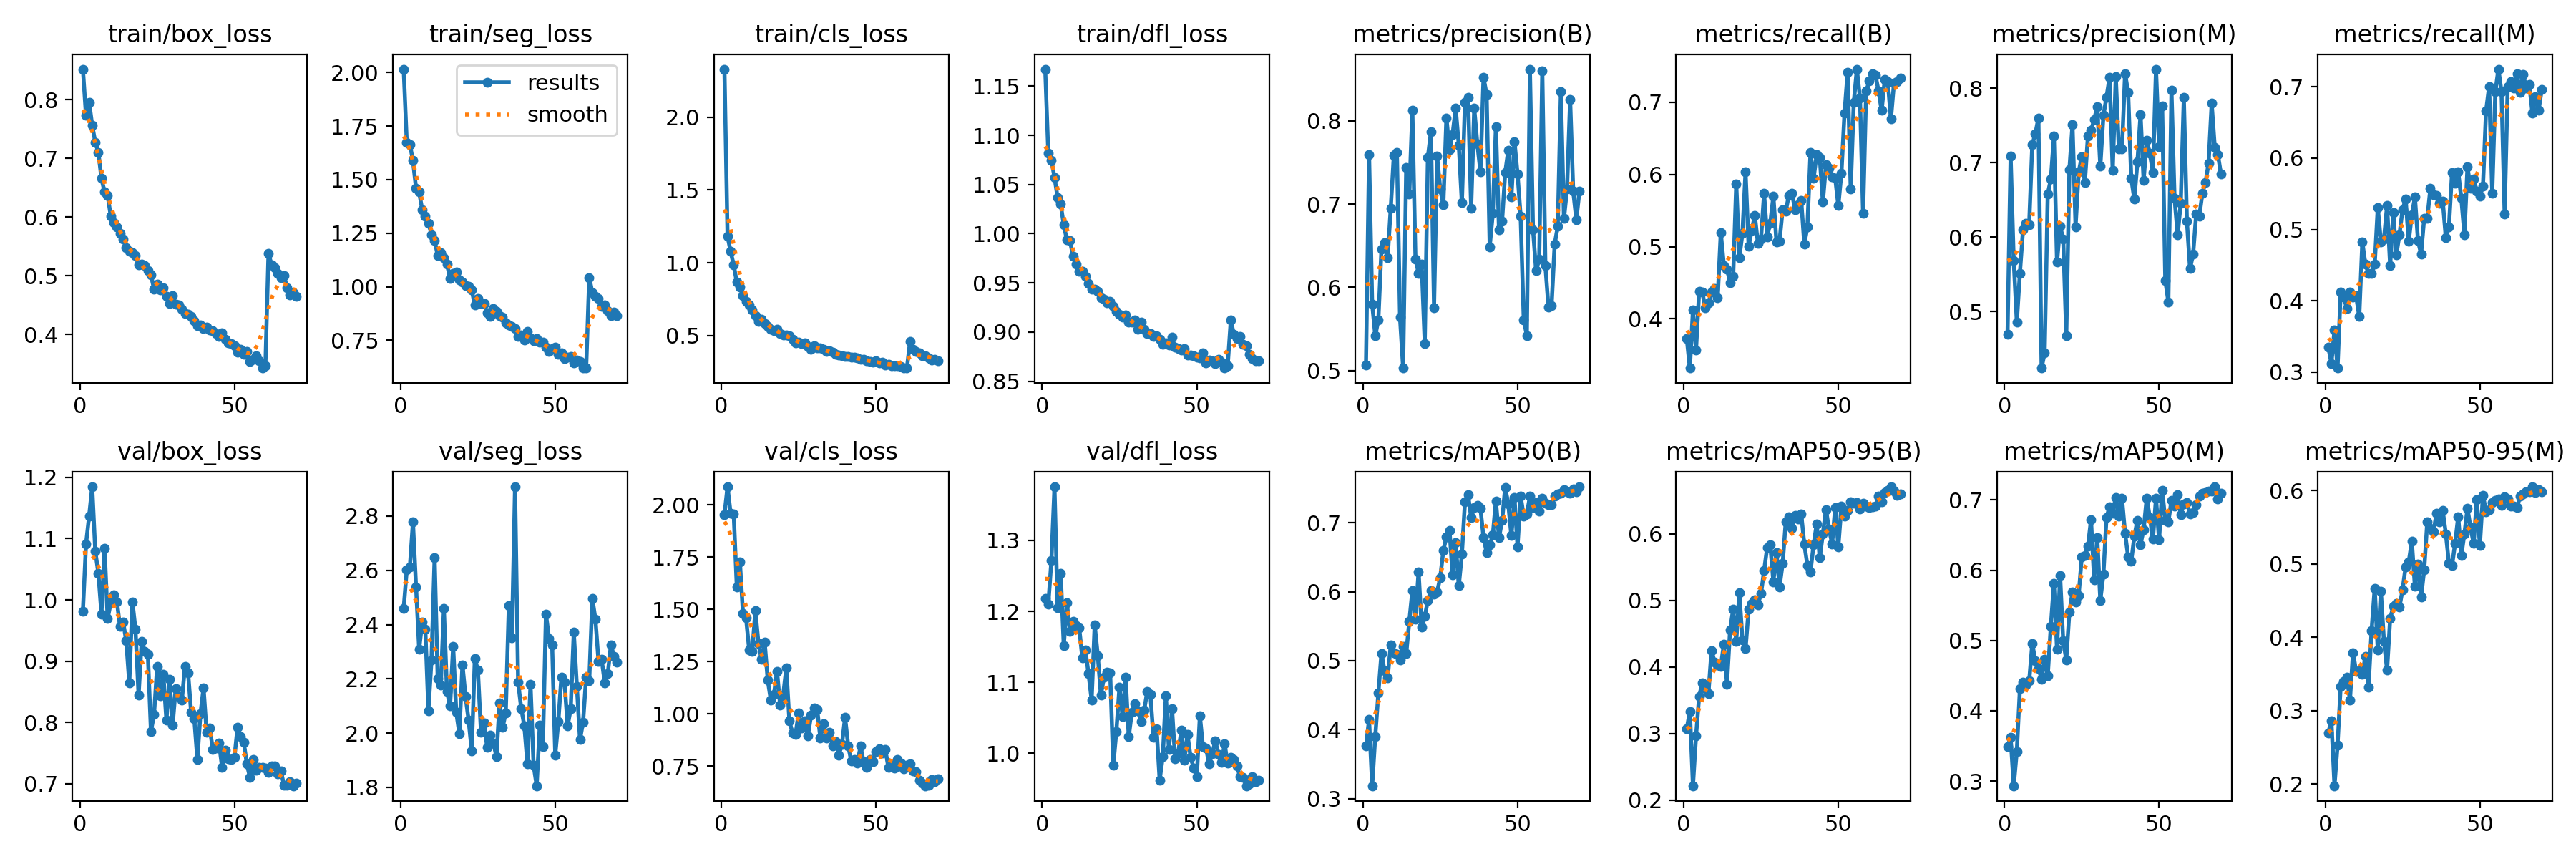

In [7]:
Image("/content/runs/segment/train/results.png")

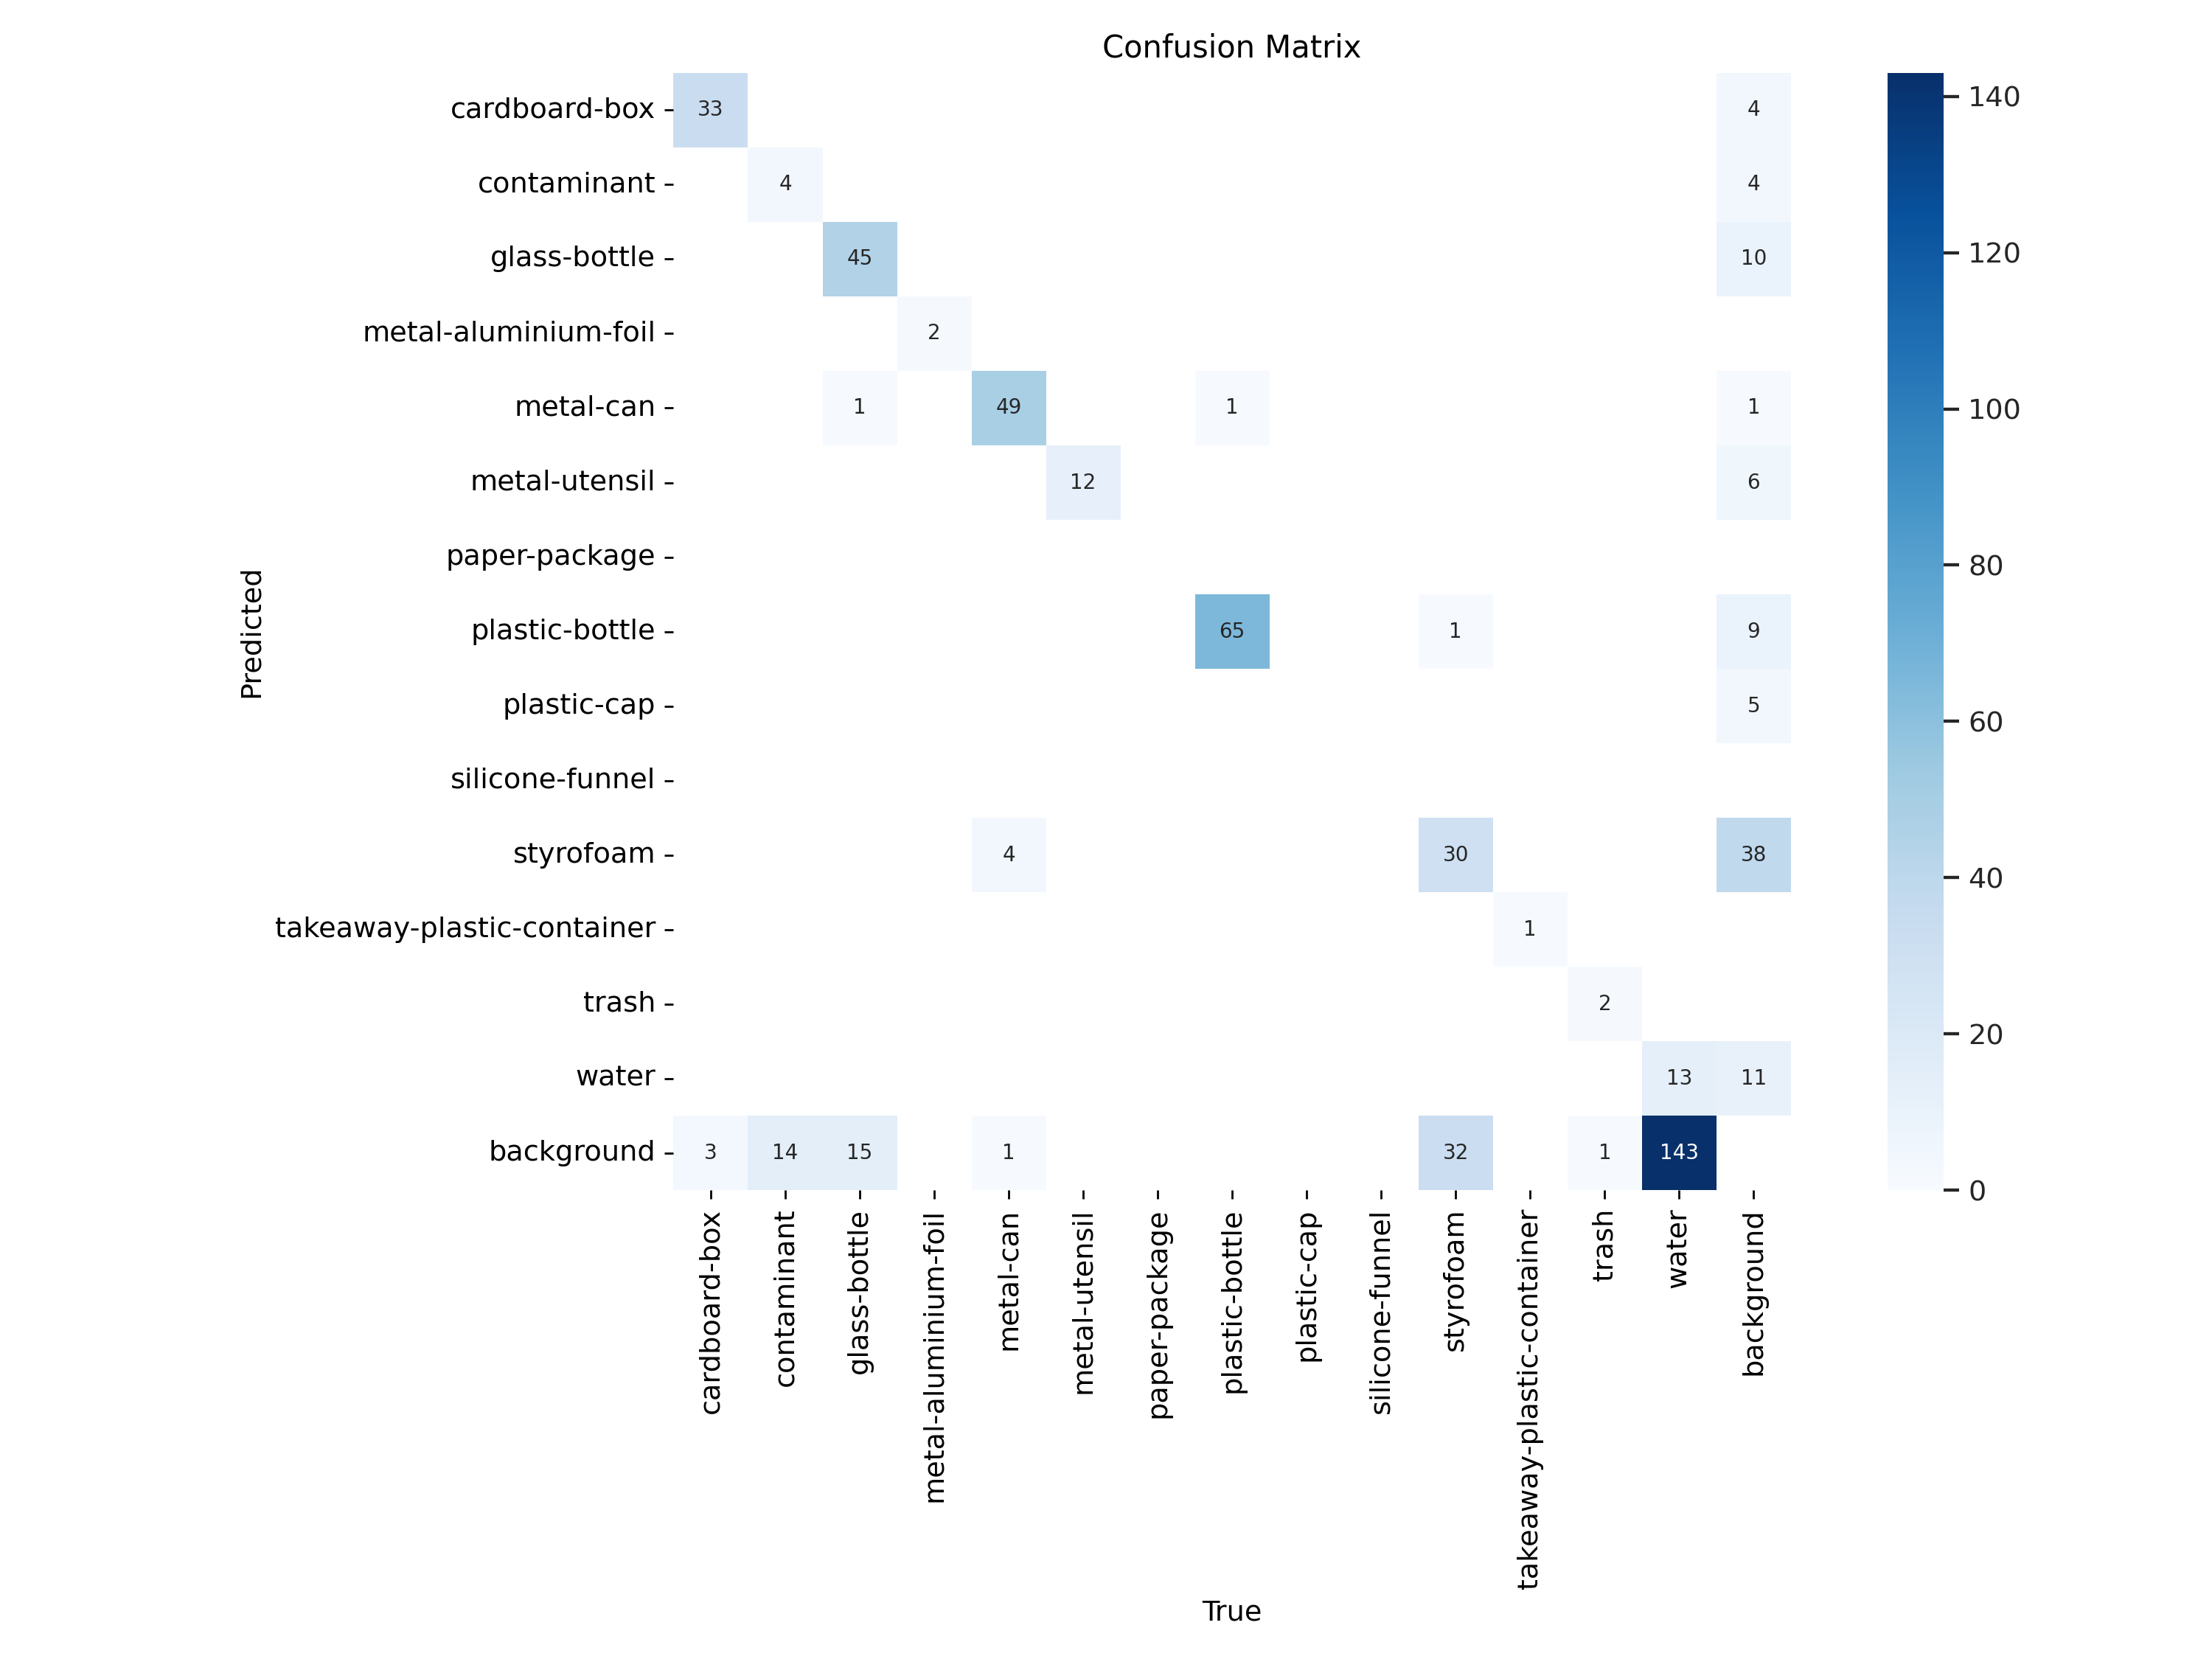

In [8]:
Image("/content/runs/segment/train/confusion_matrix.png")

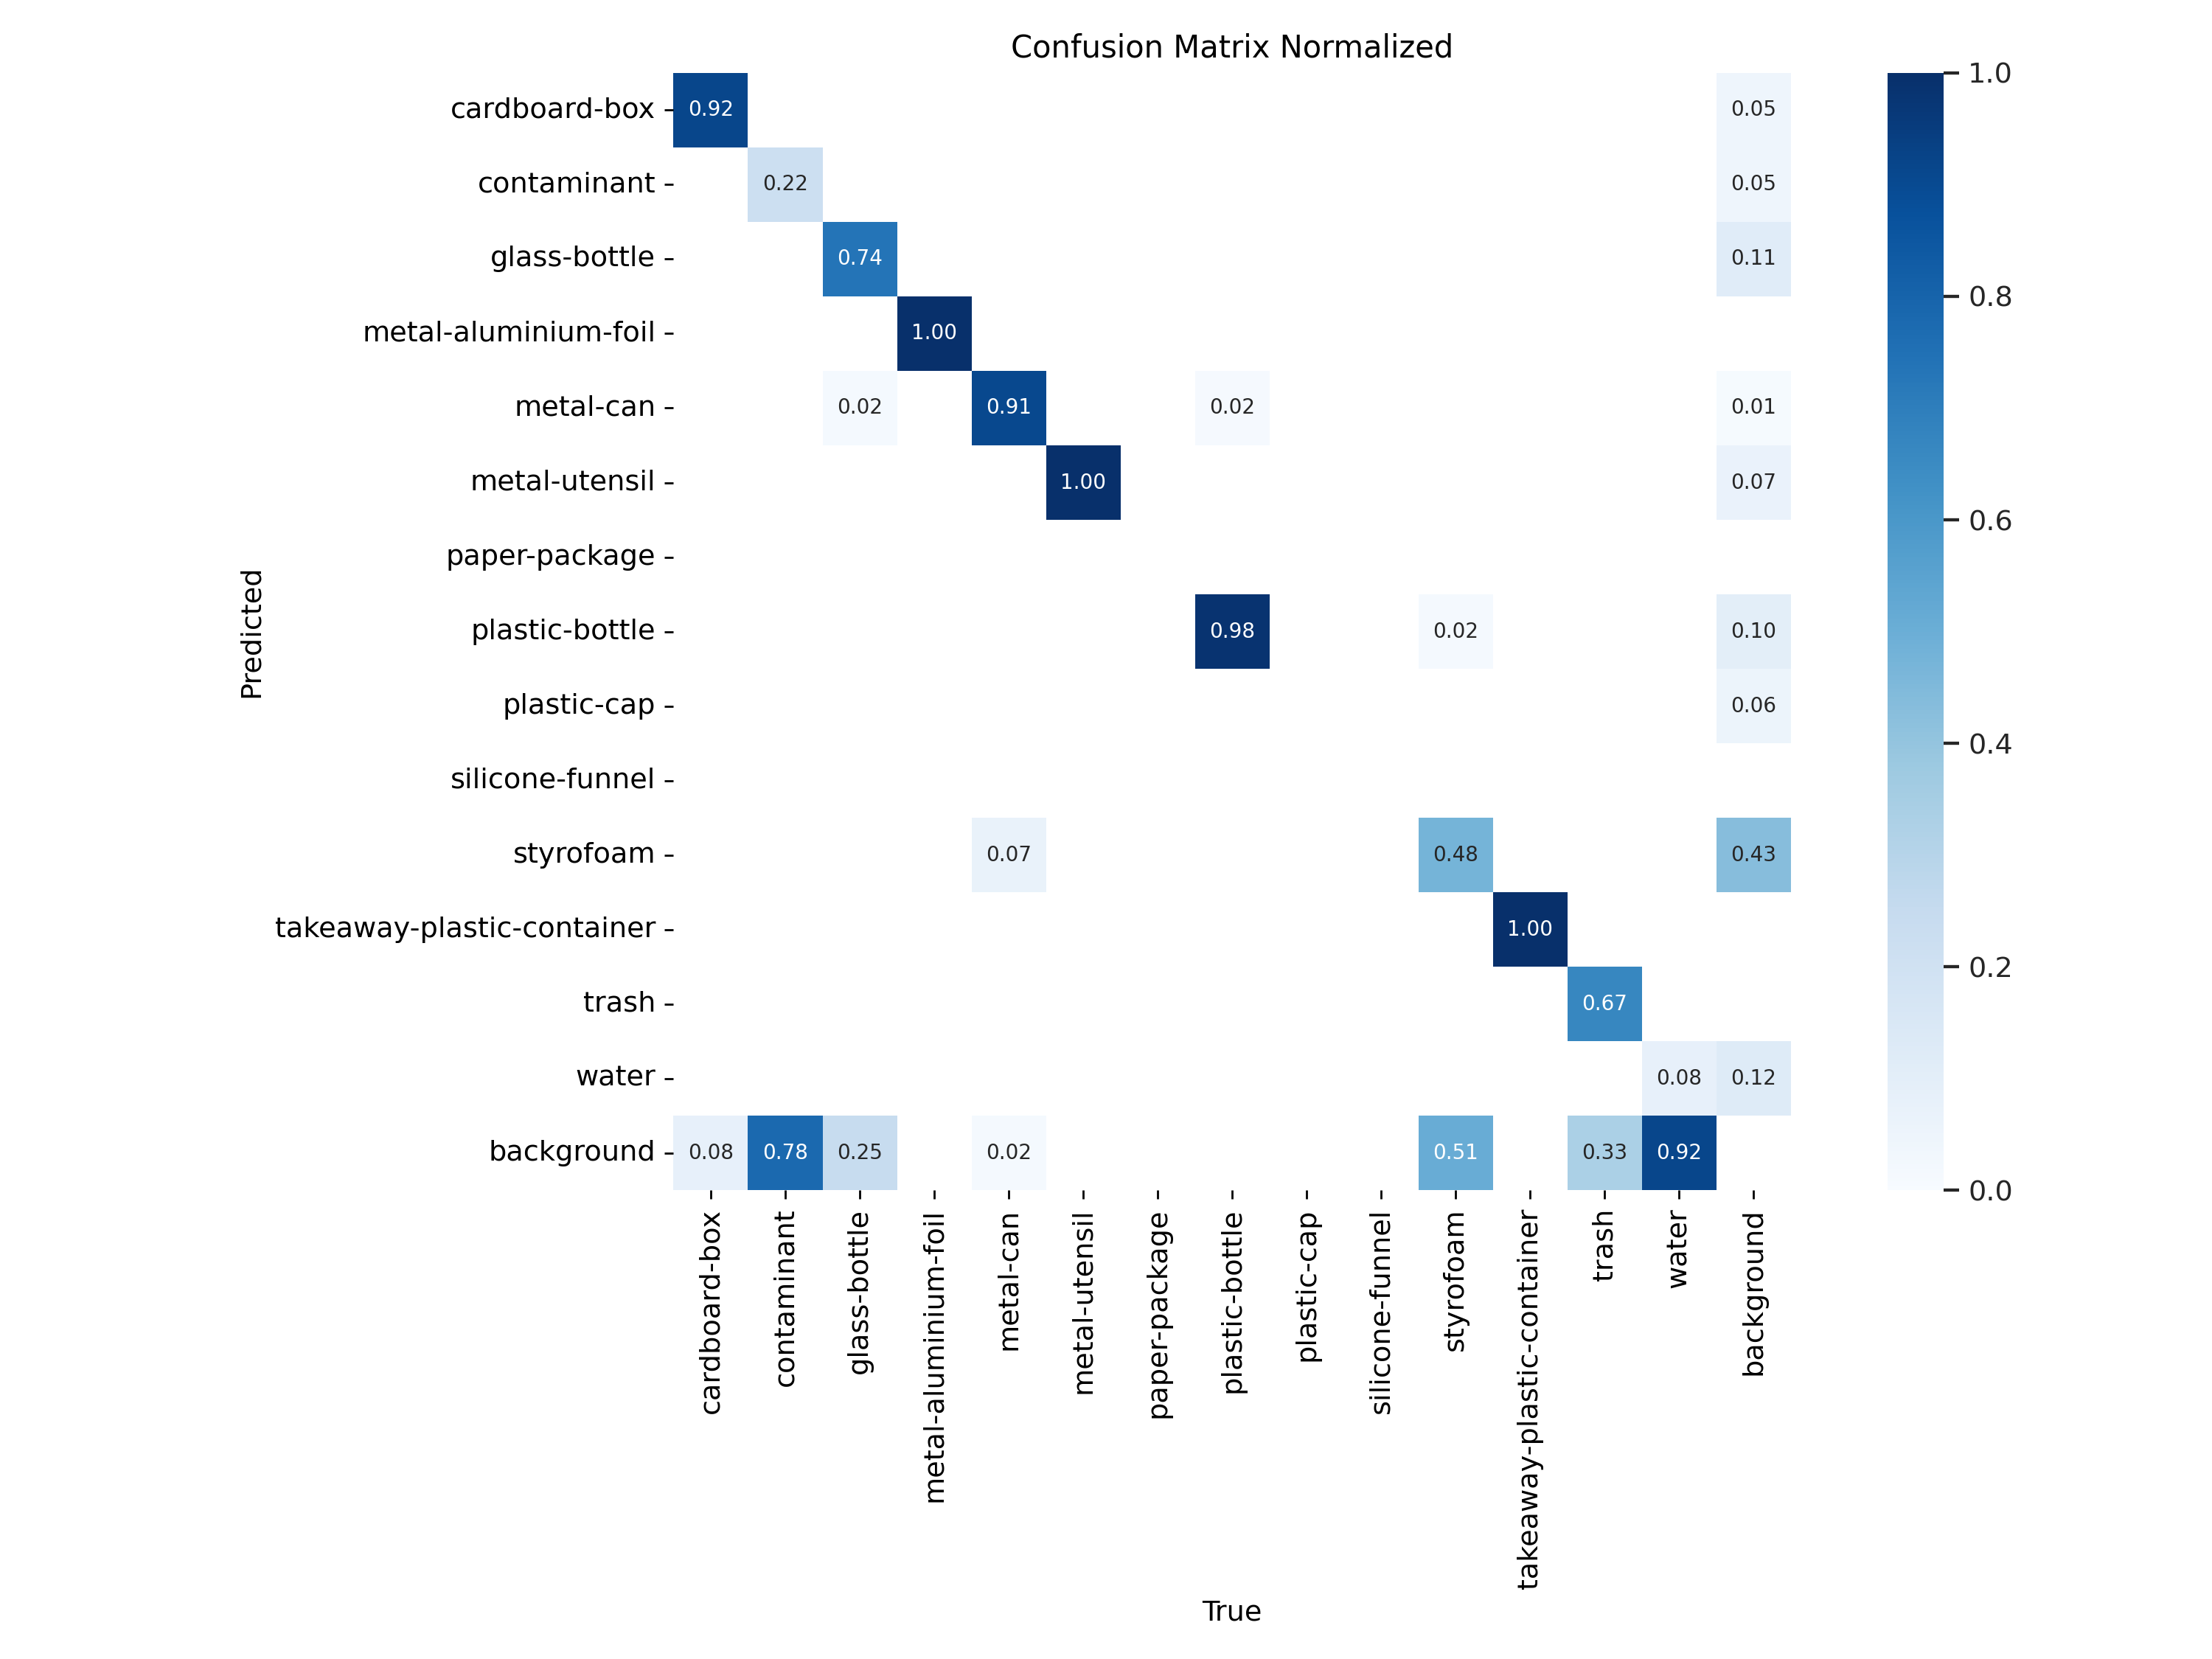

In [9]:
Image("/content/runs/segment/train/confusion_matrix_normalized.png")

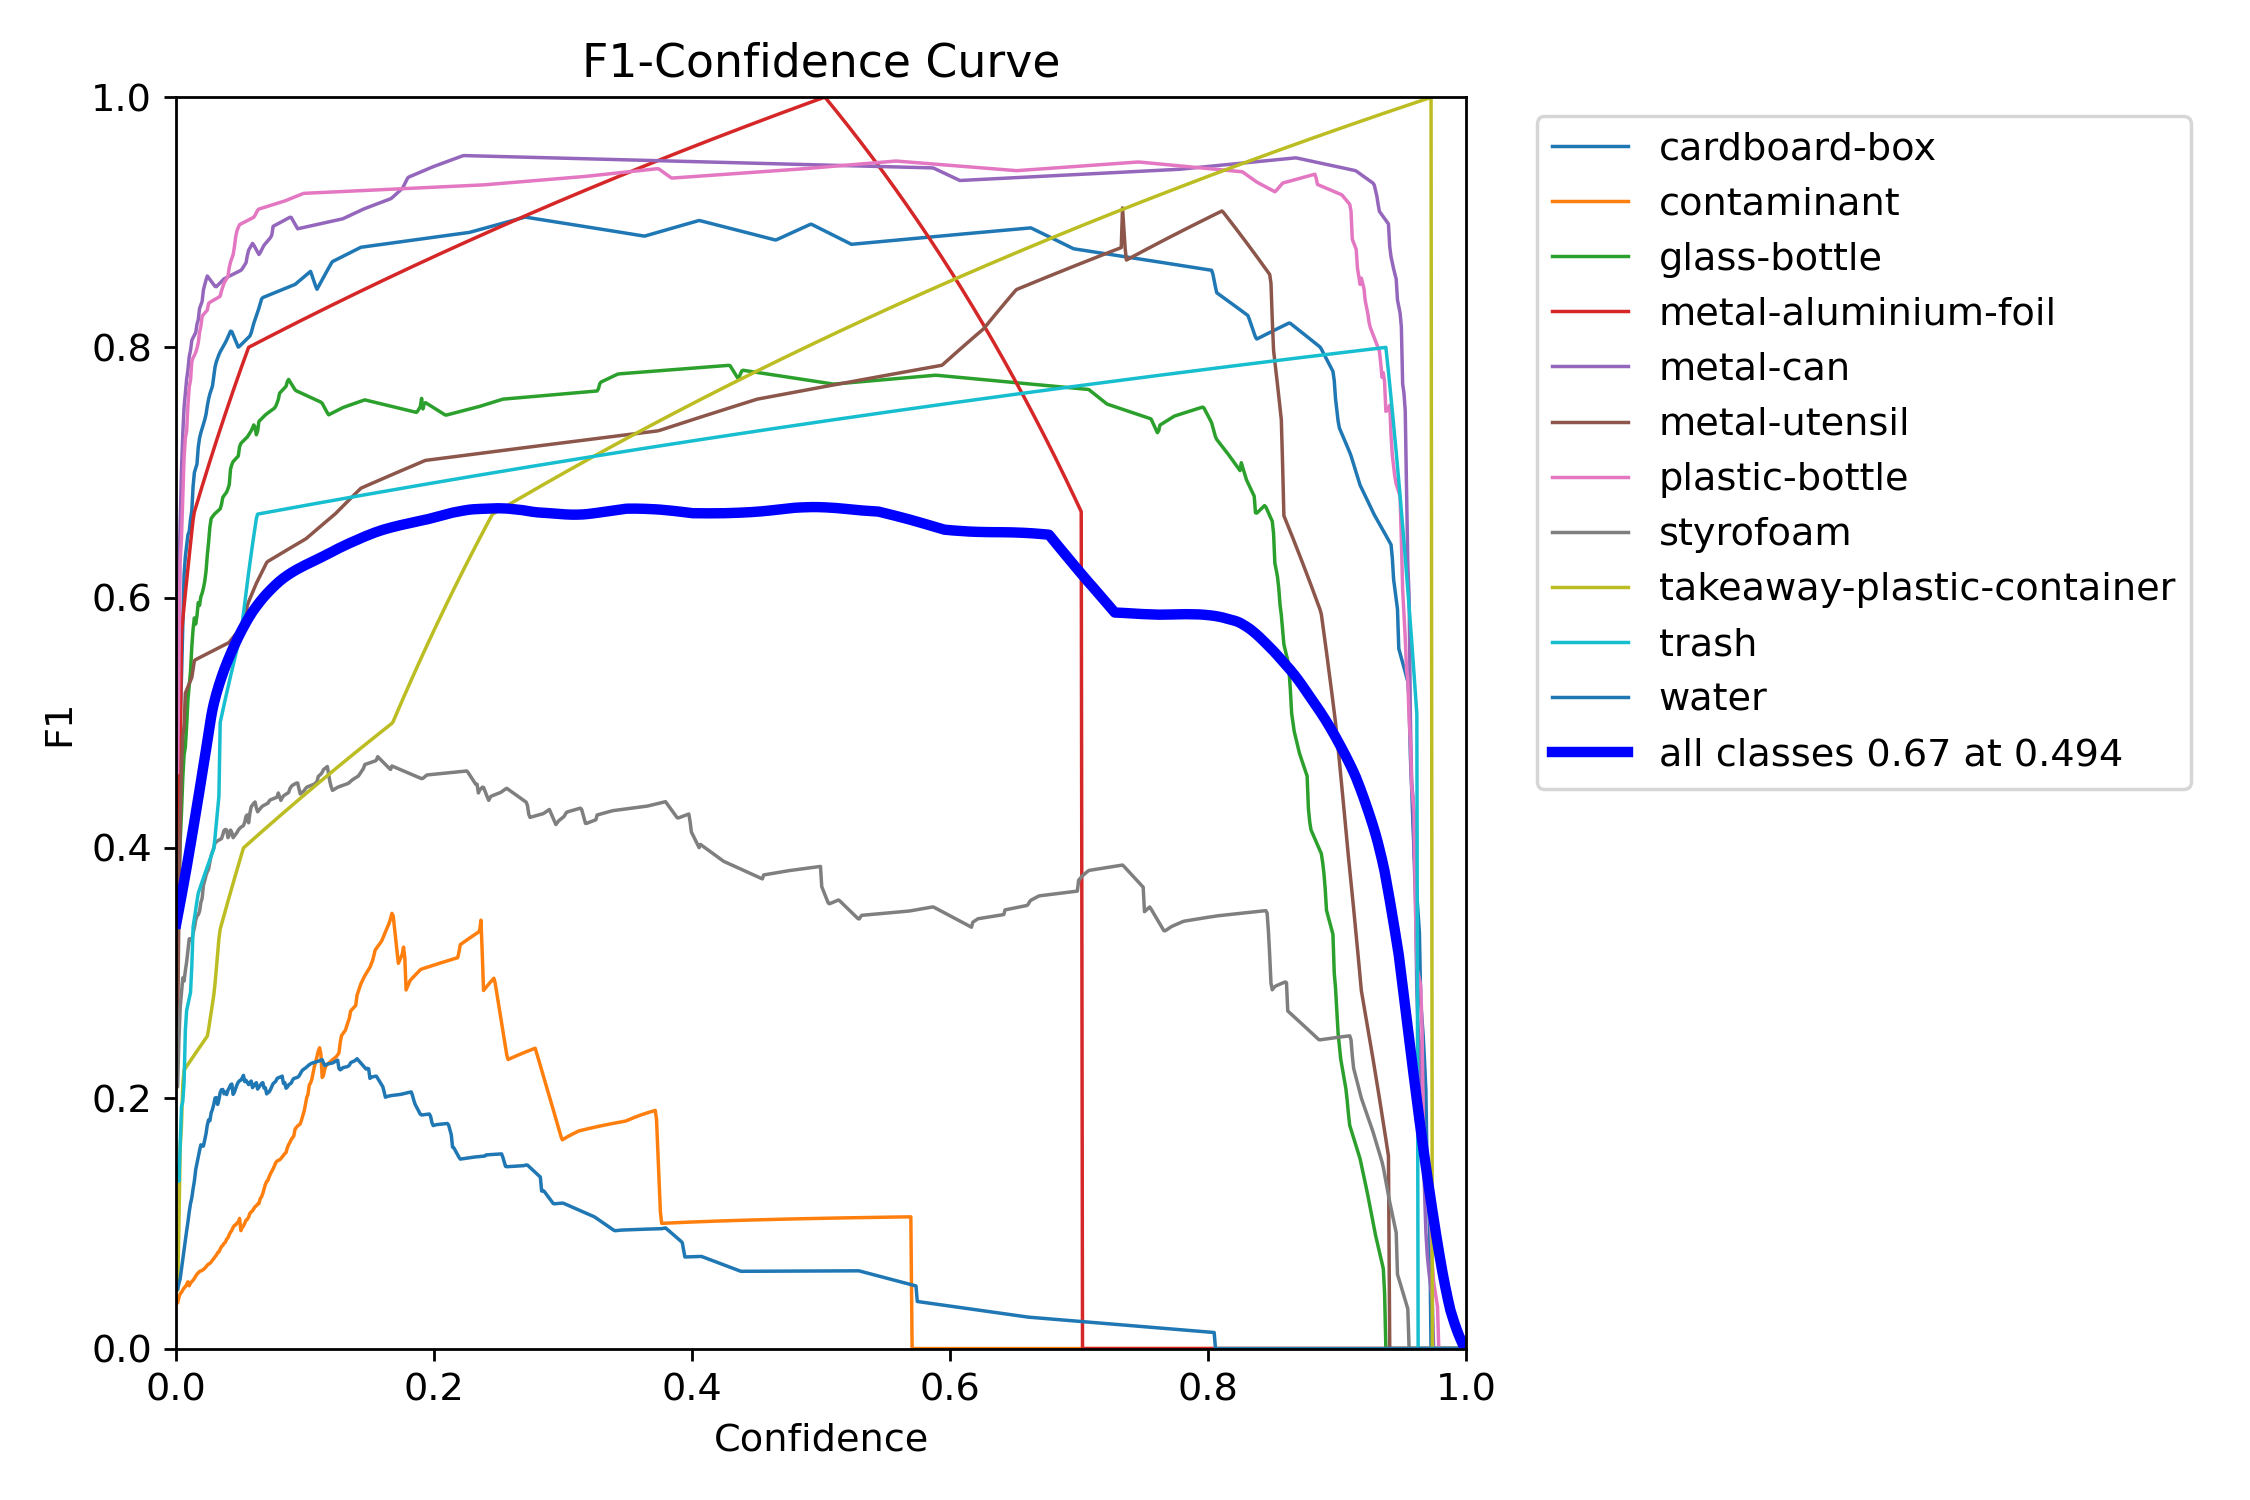

In [10]:
Image("/content/runs/segment/train/BoxF1_curve.png")

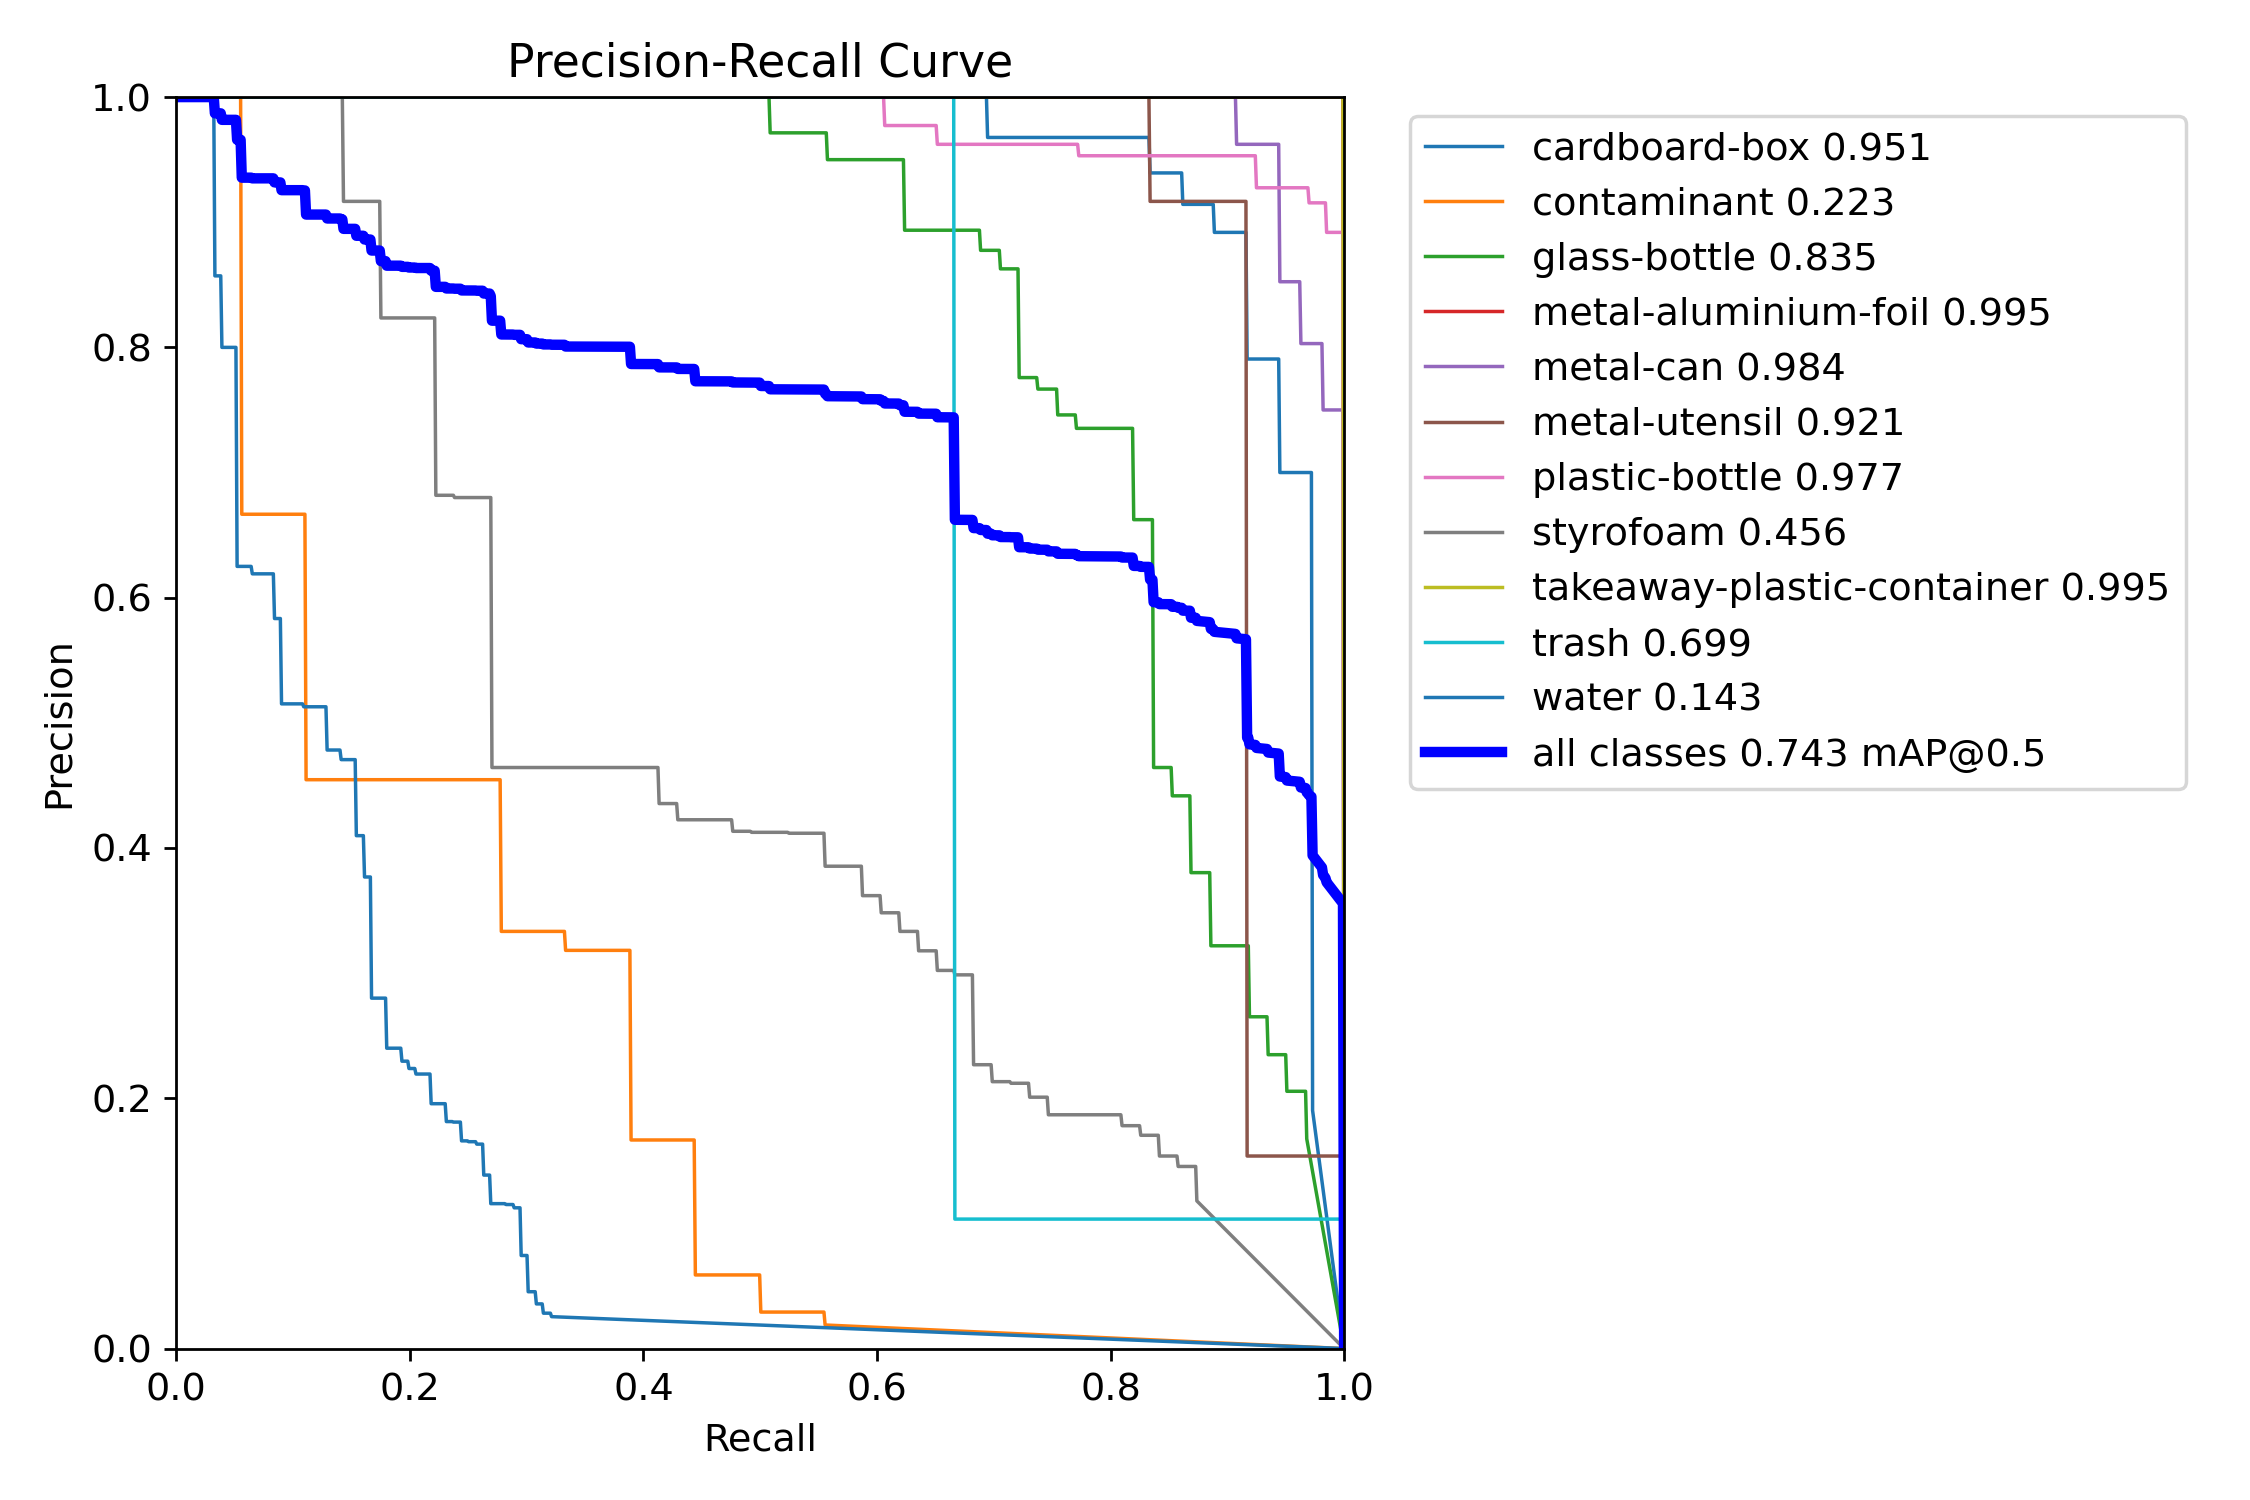

In [11]:
Image("/content/runs/segment/train/BoxPR_curve.png")

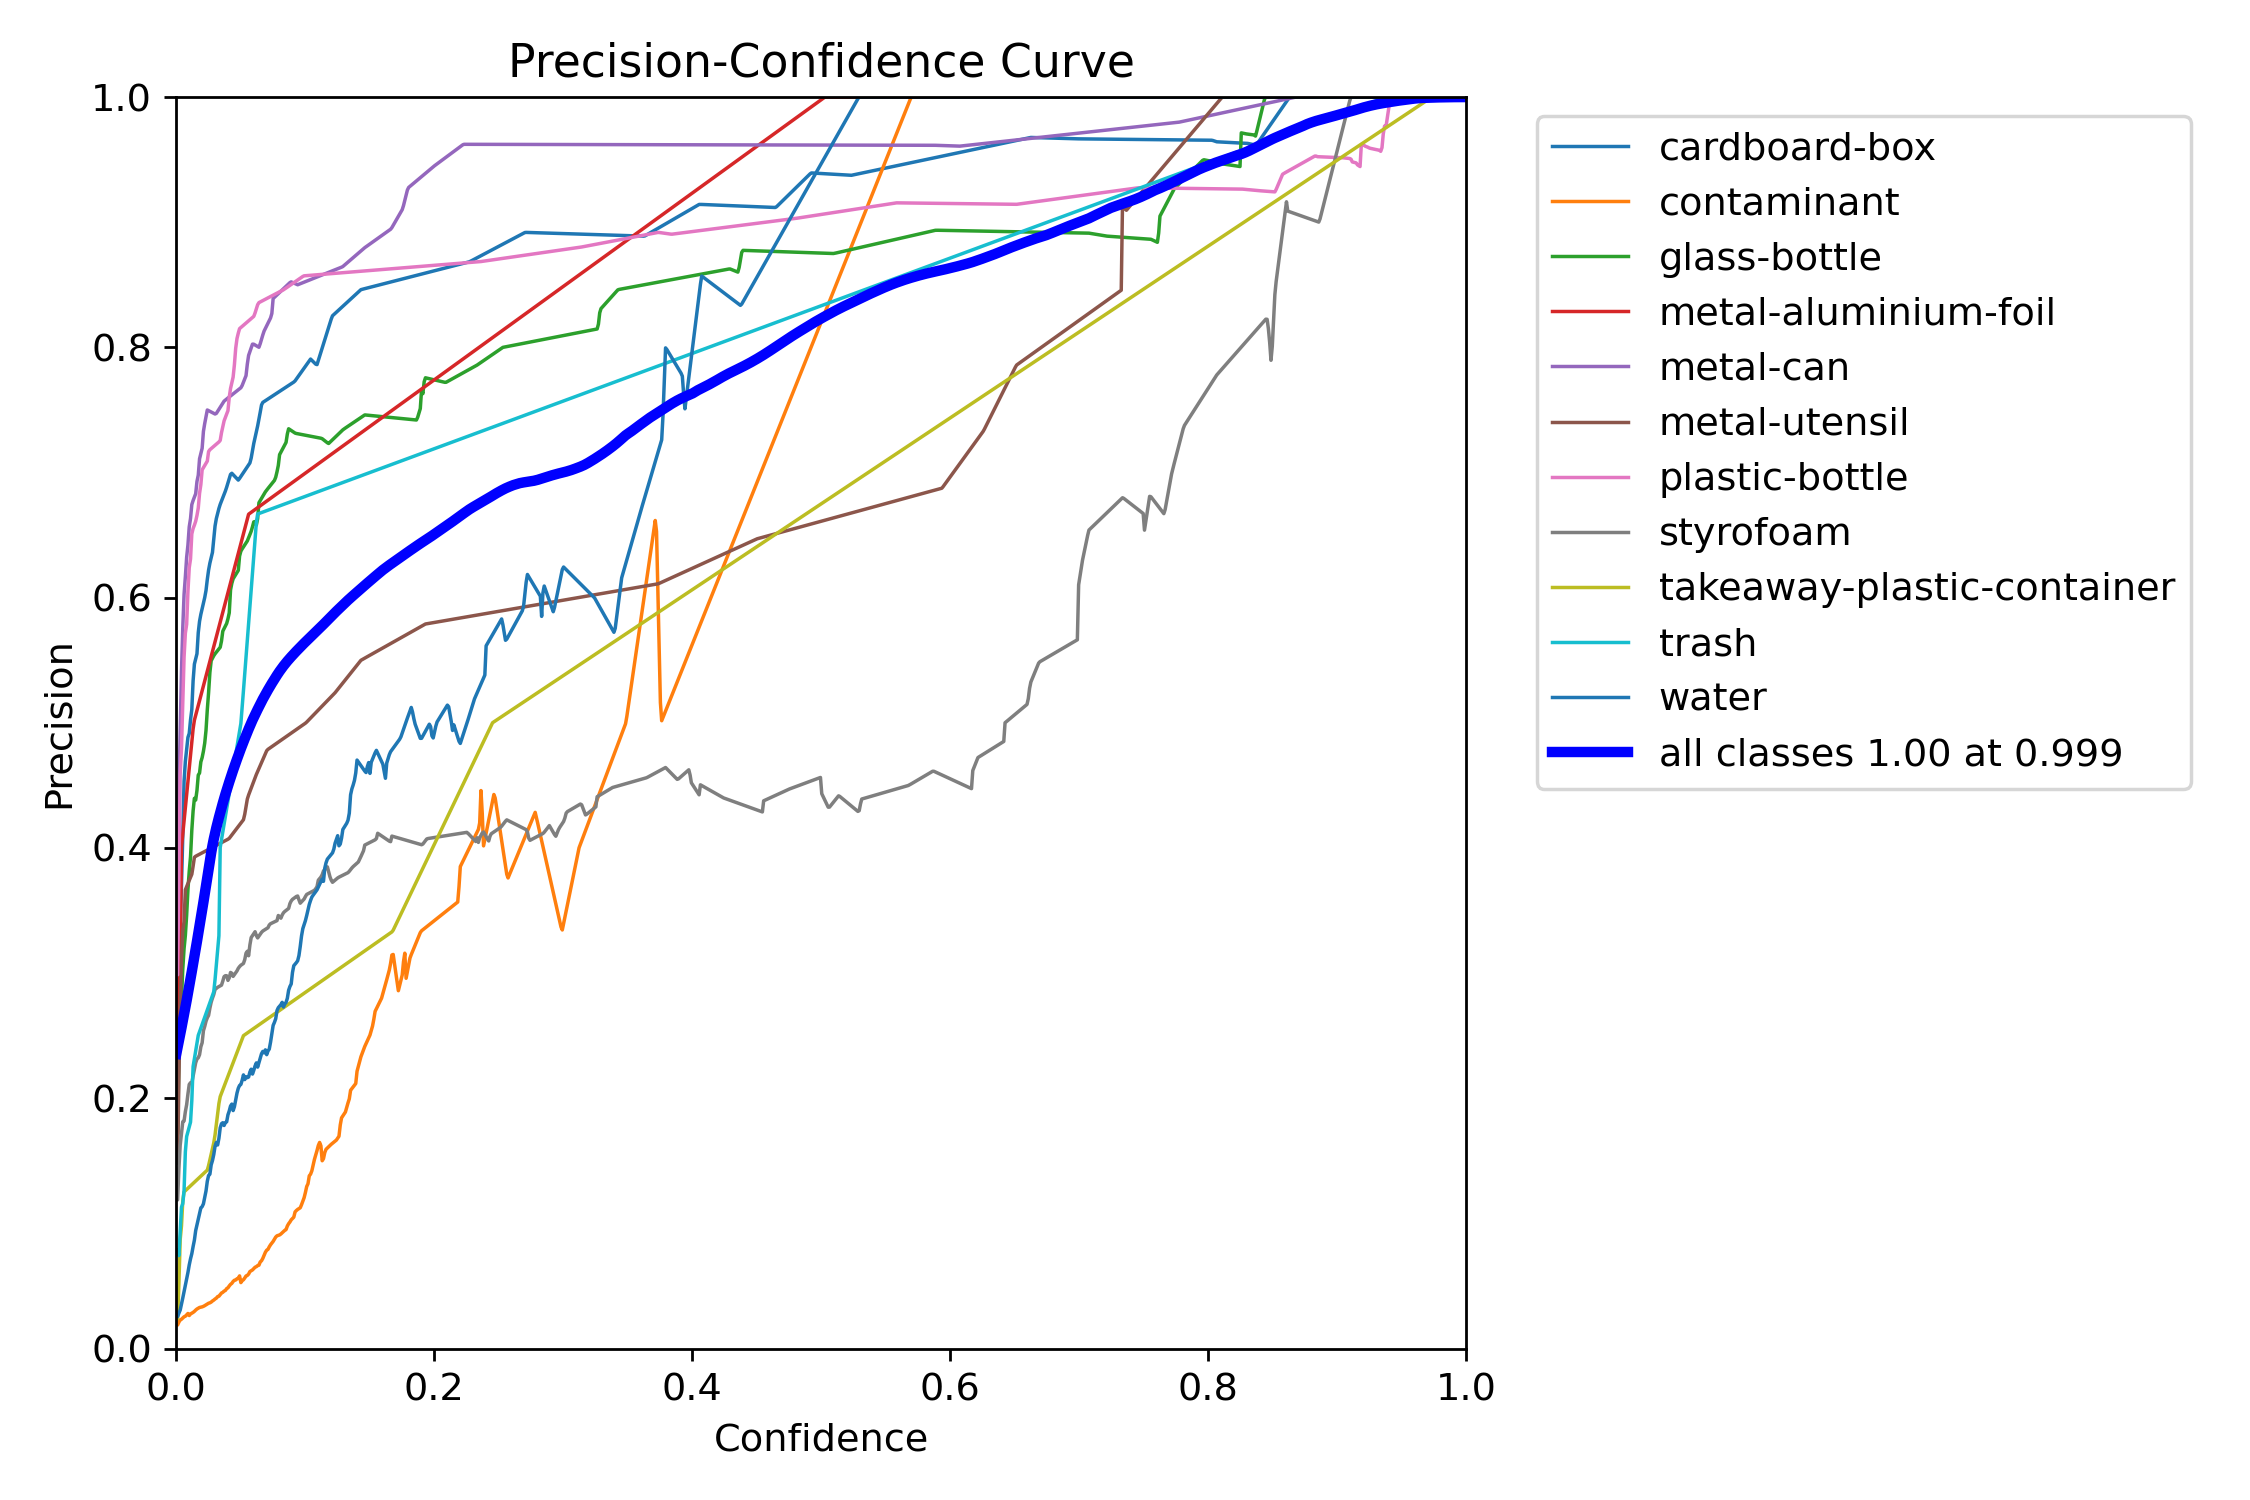

In [12]:
Image("/content/runs/segment/train/BoxP_curve.png")

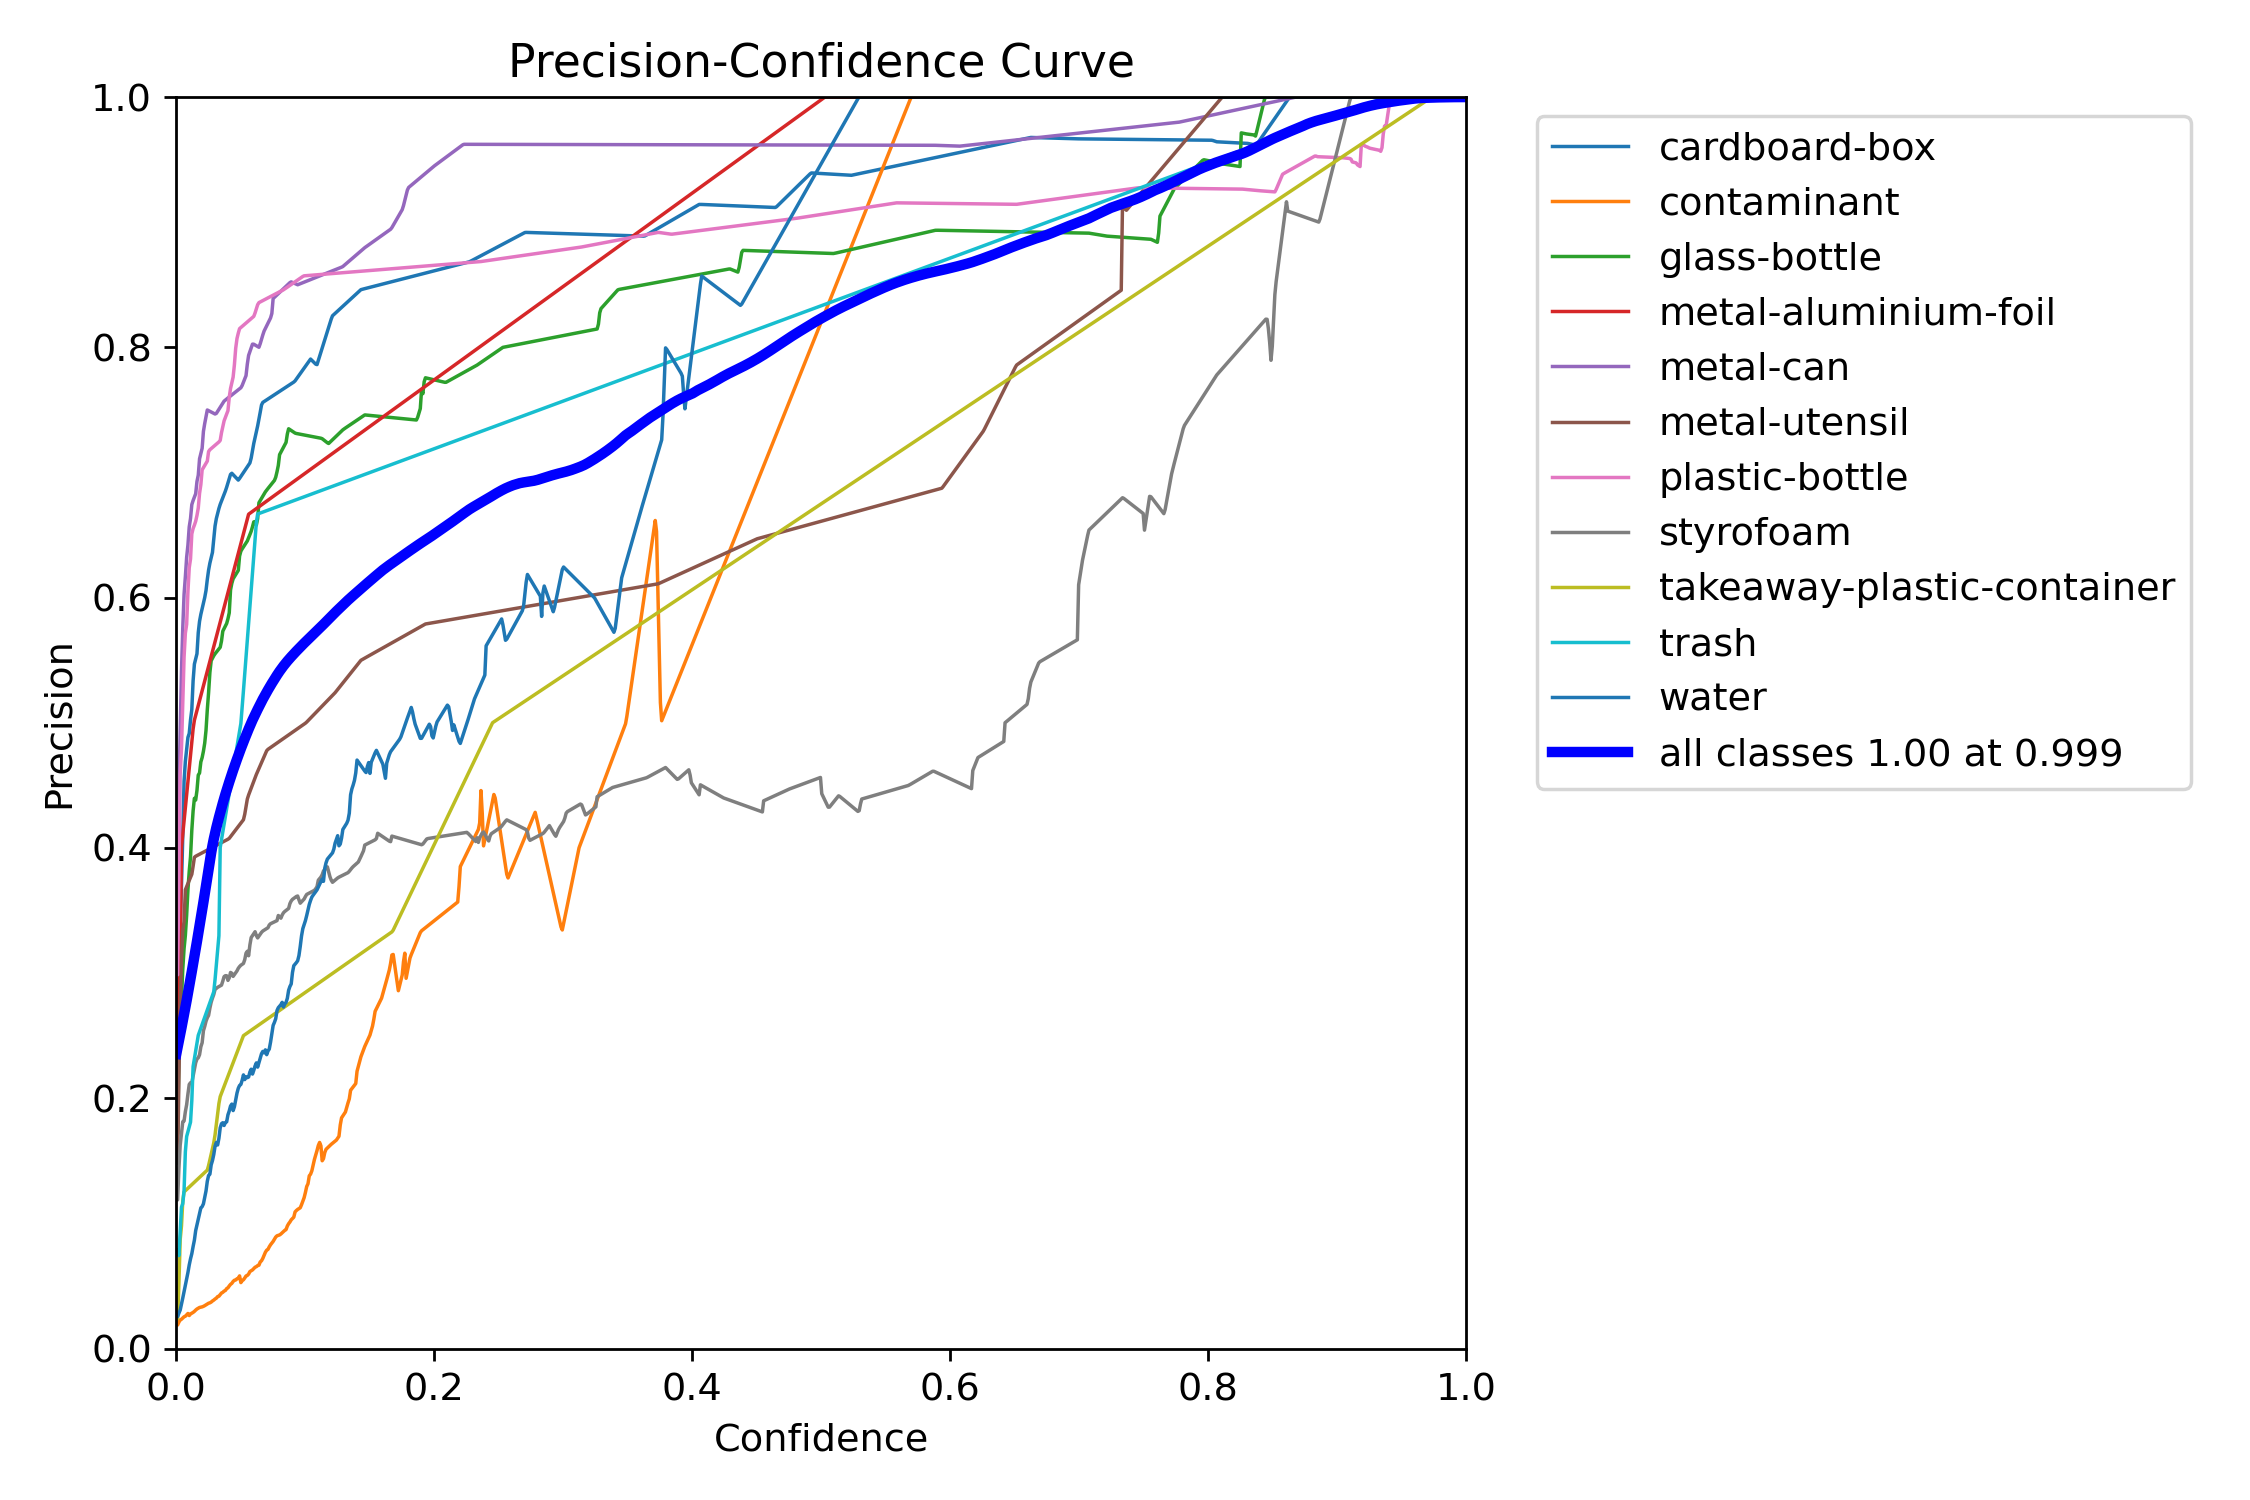

In [13]:
Image("/content/runs/segment/train/BoxP_curve.png")

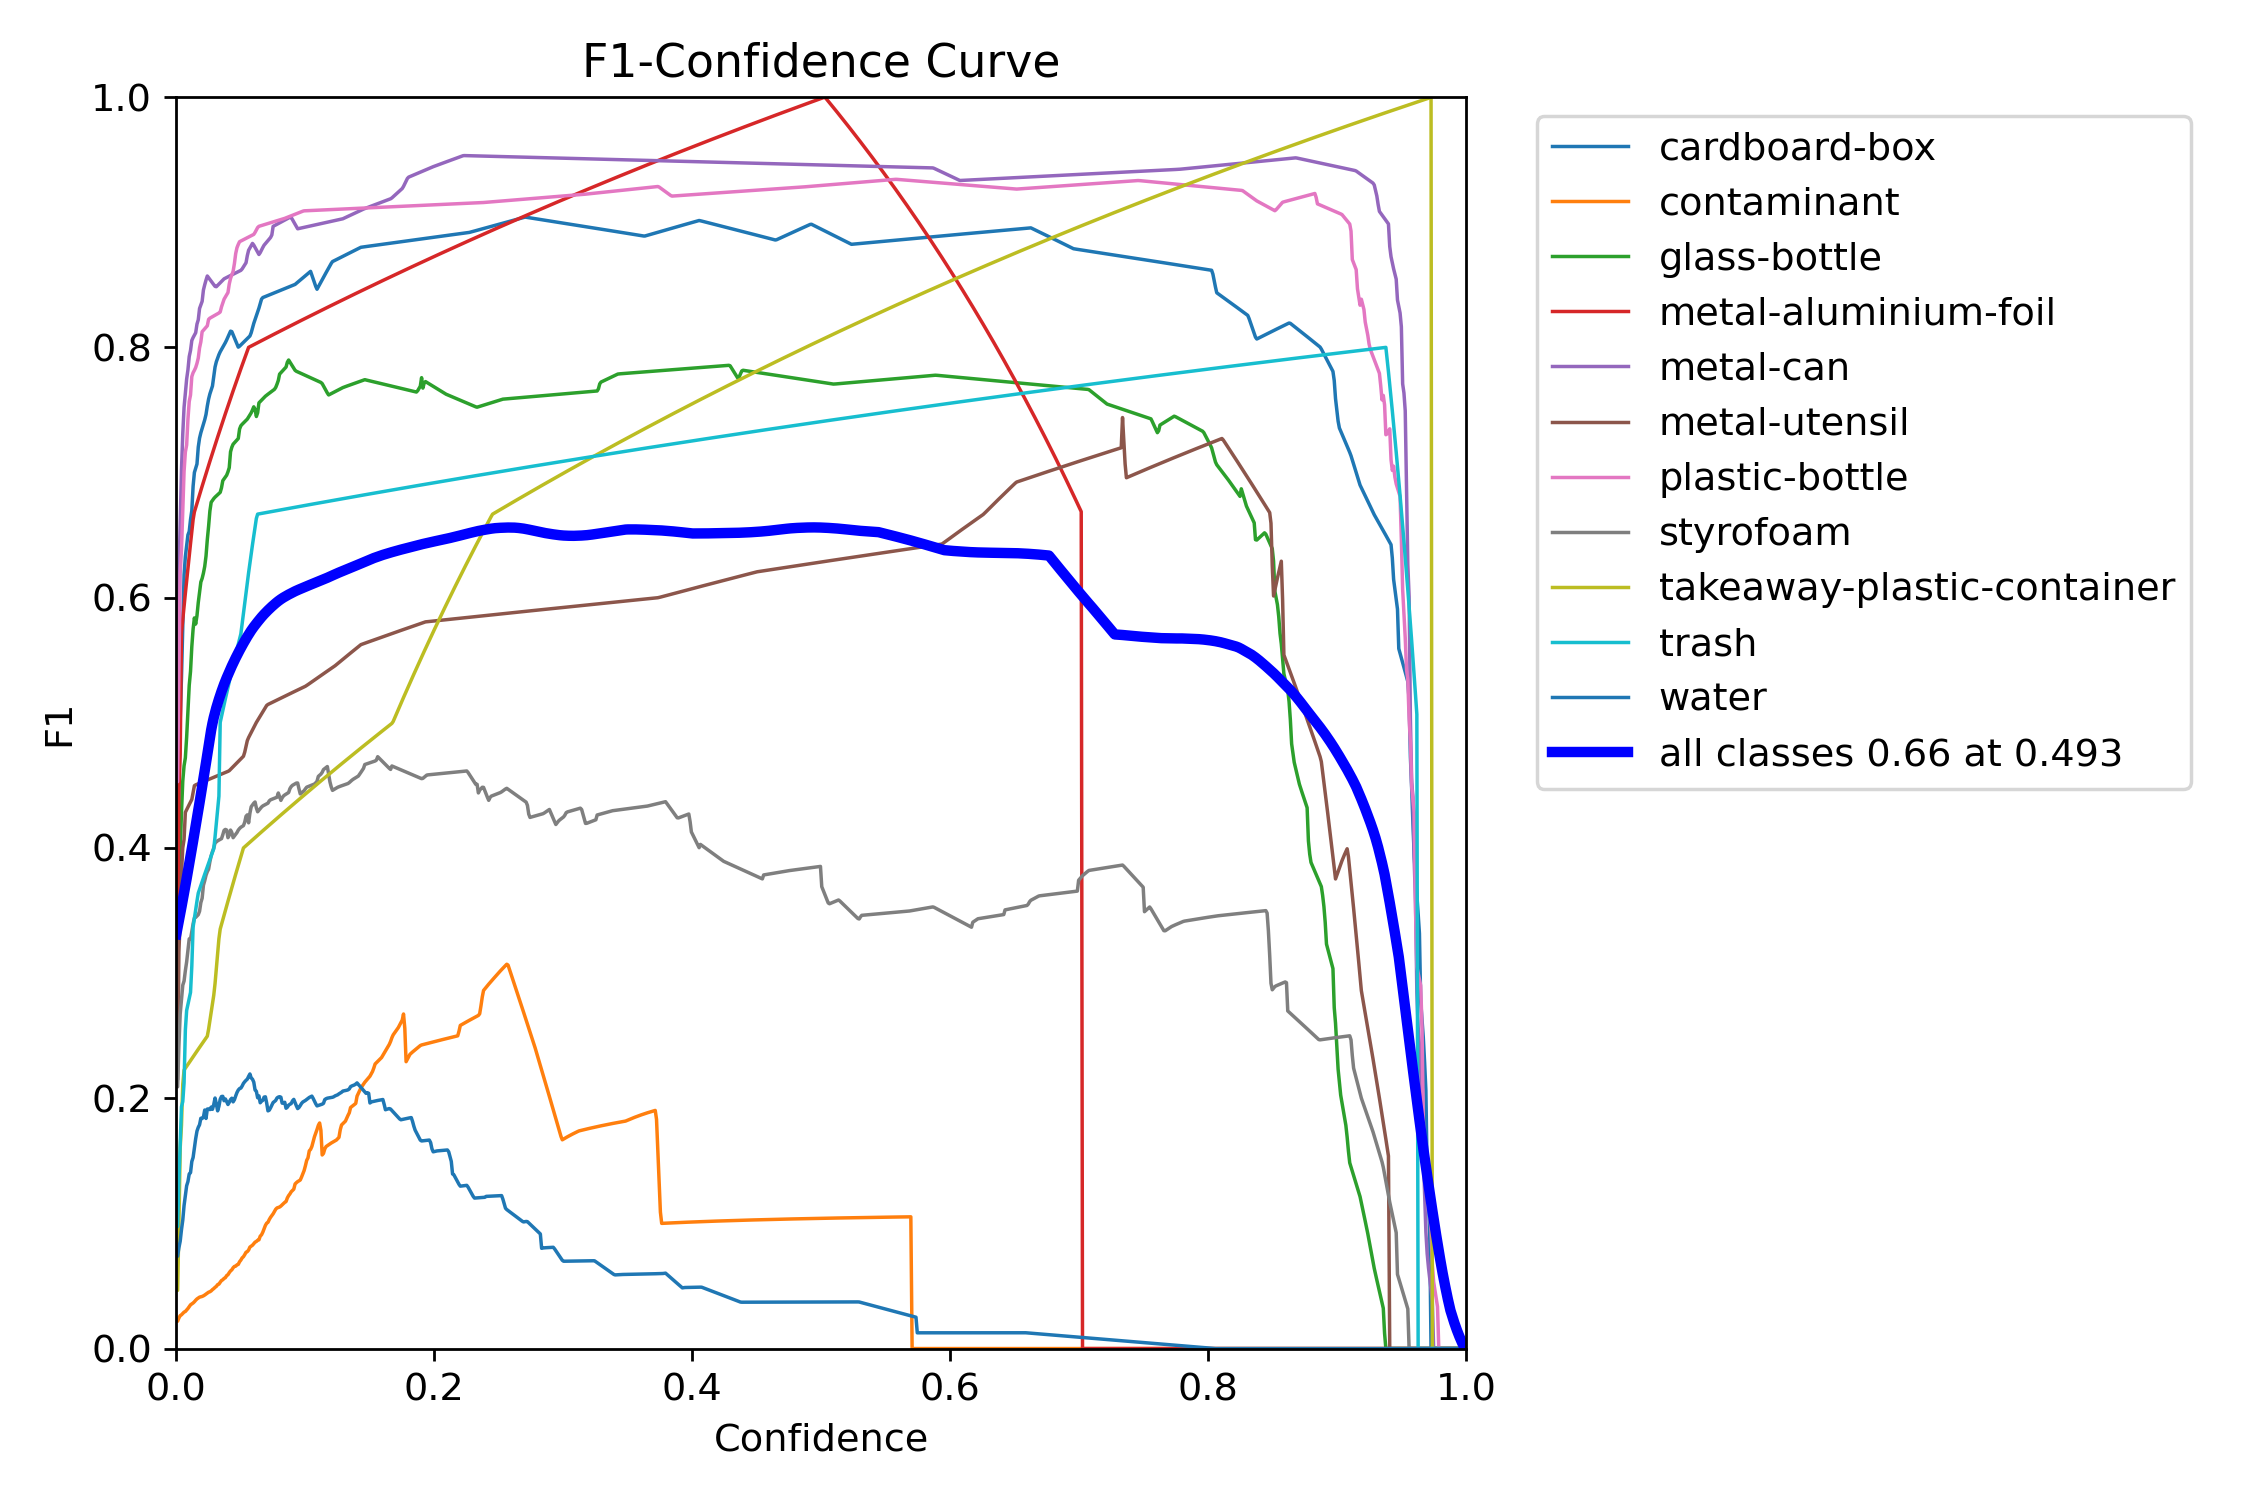

In [14]:
Image("/content/runs/segment/train/MaskF1_curve.png")

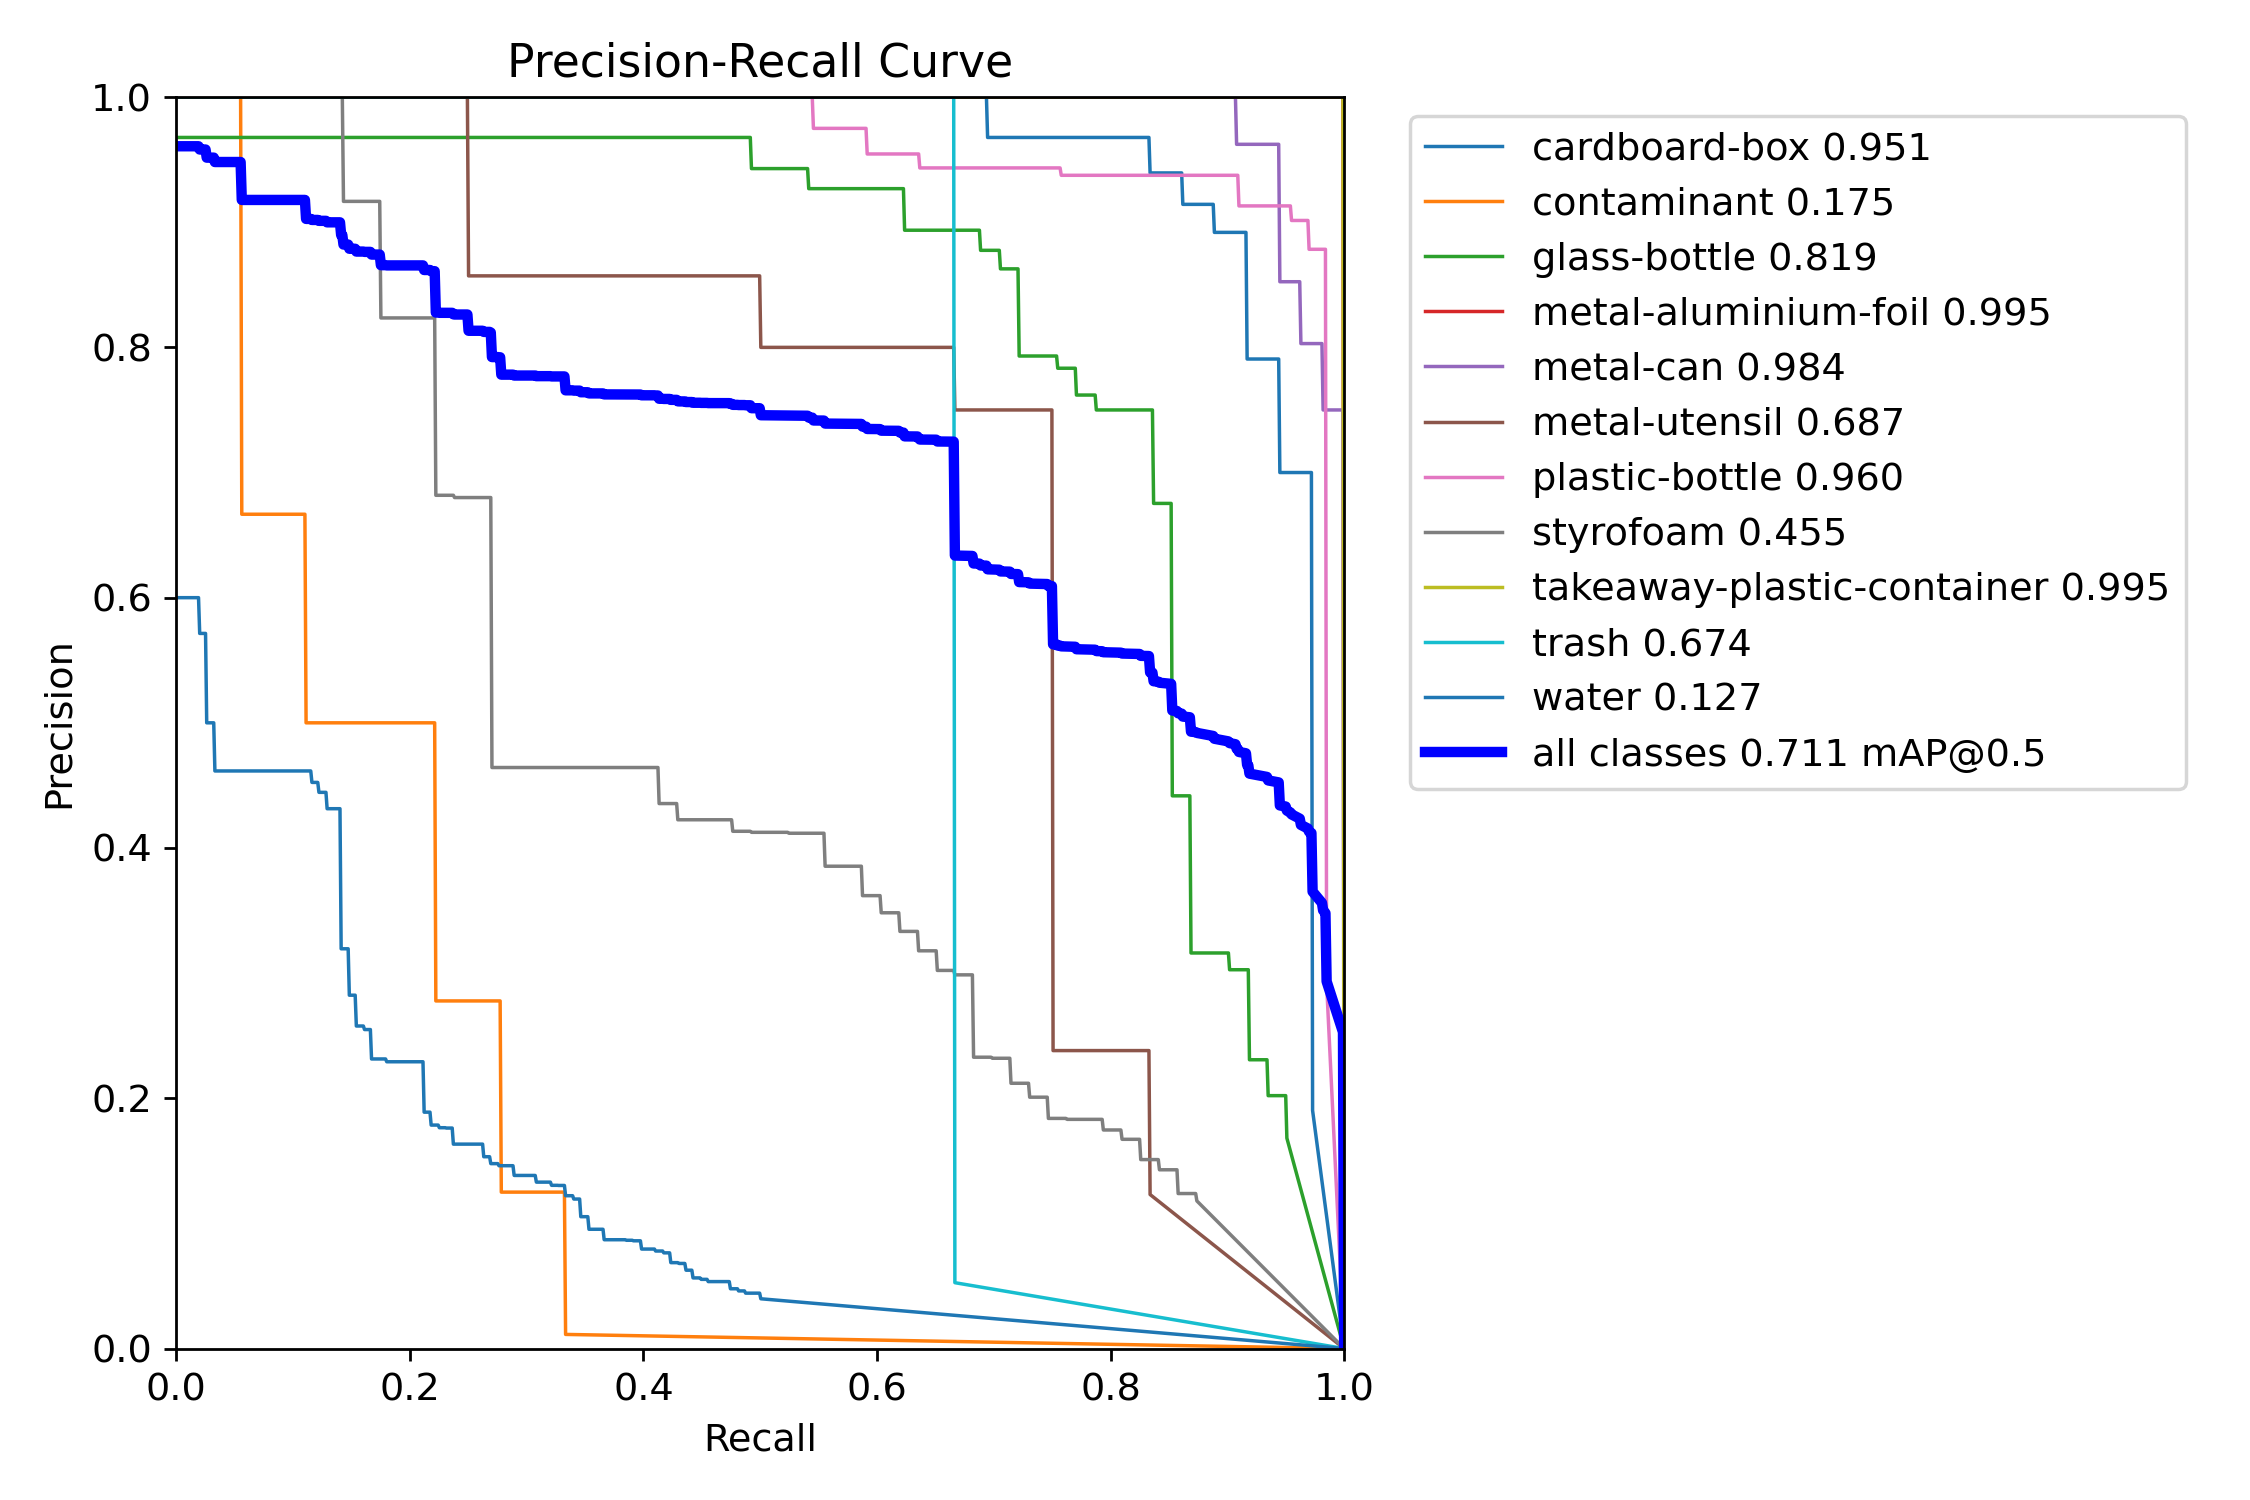

In [15]:
Image("/content/runs/segment/train/MaskPR_curve.png")

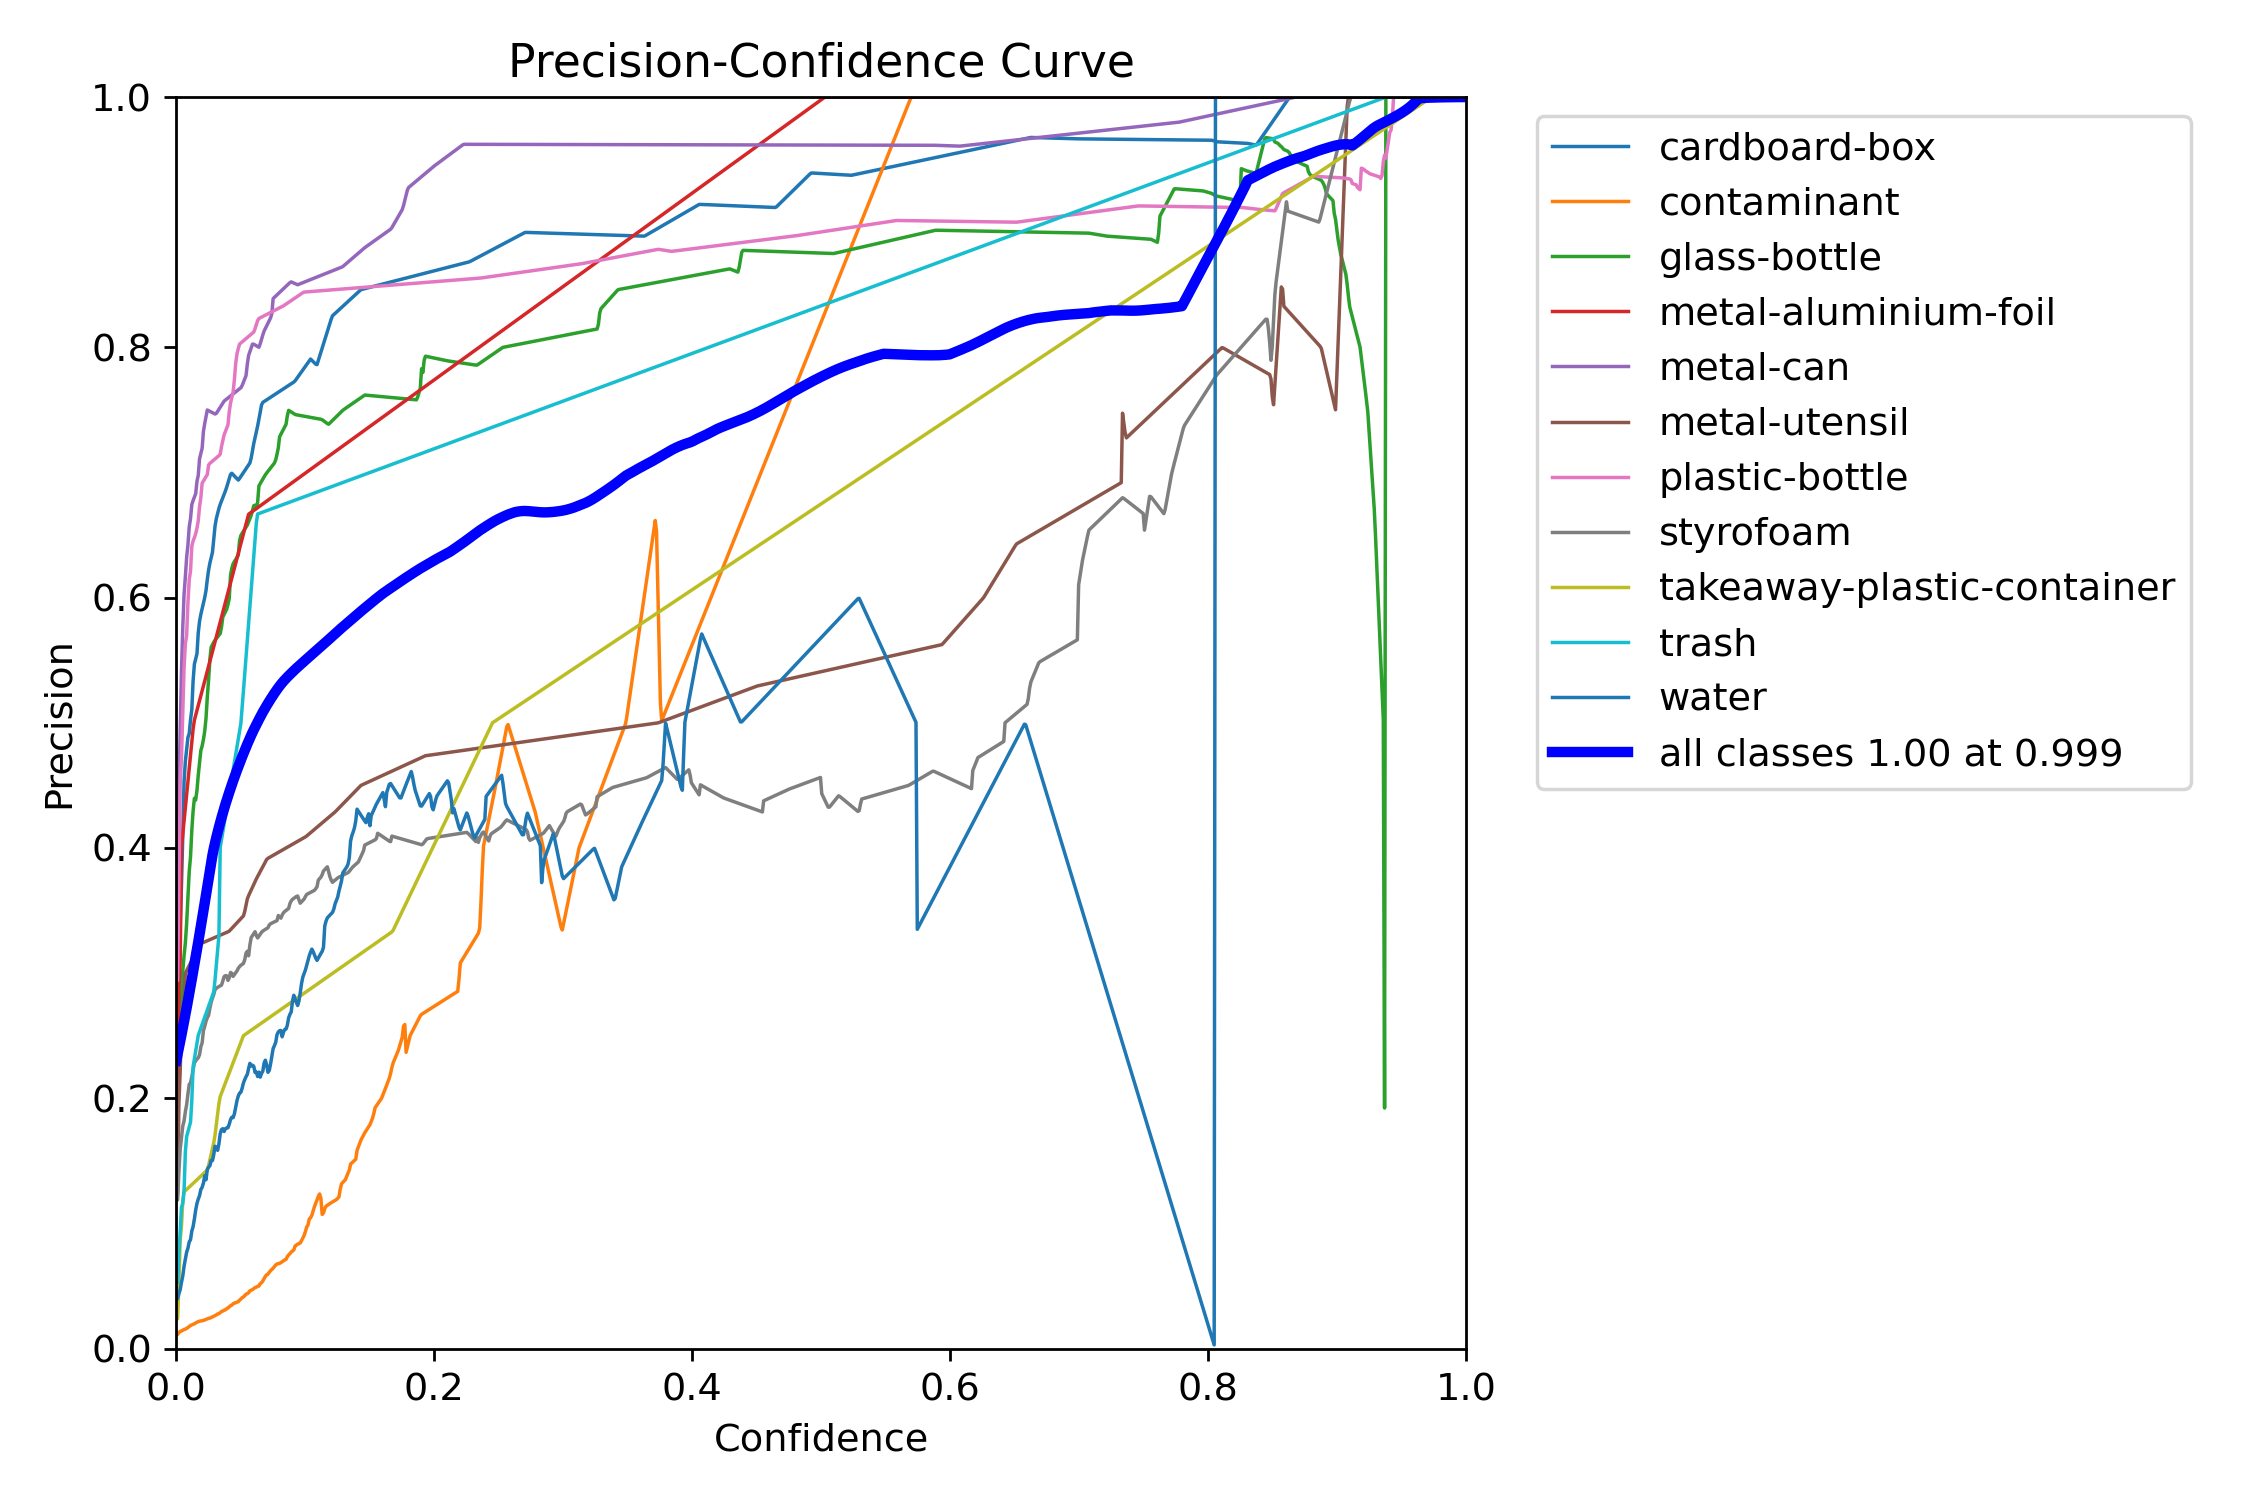

In [16]:
Image("/content/runs/segment/train/MaskP_curve.png")

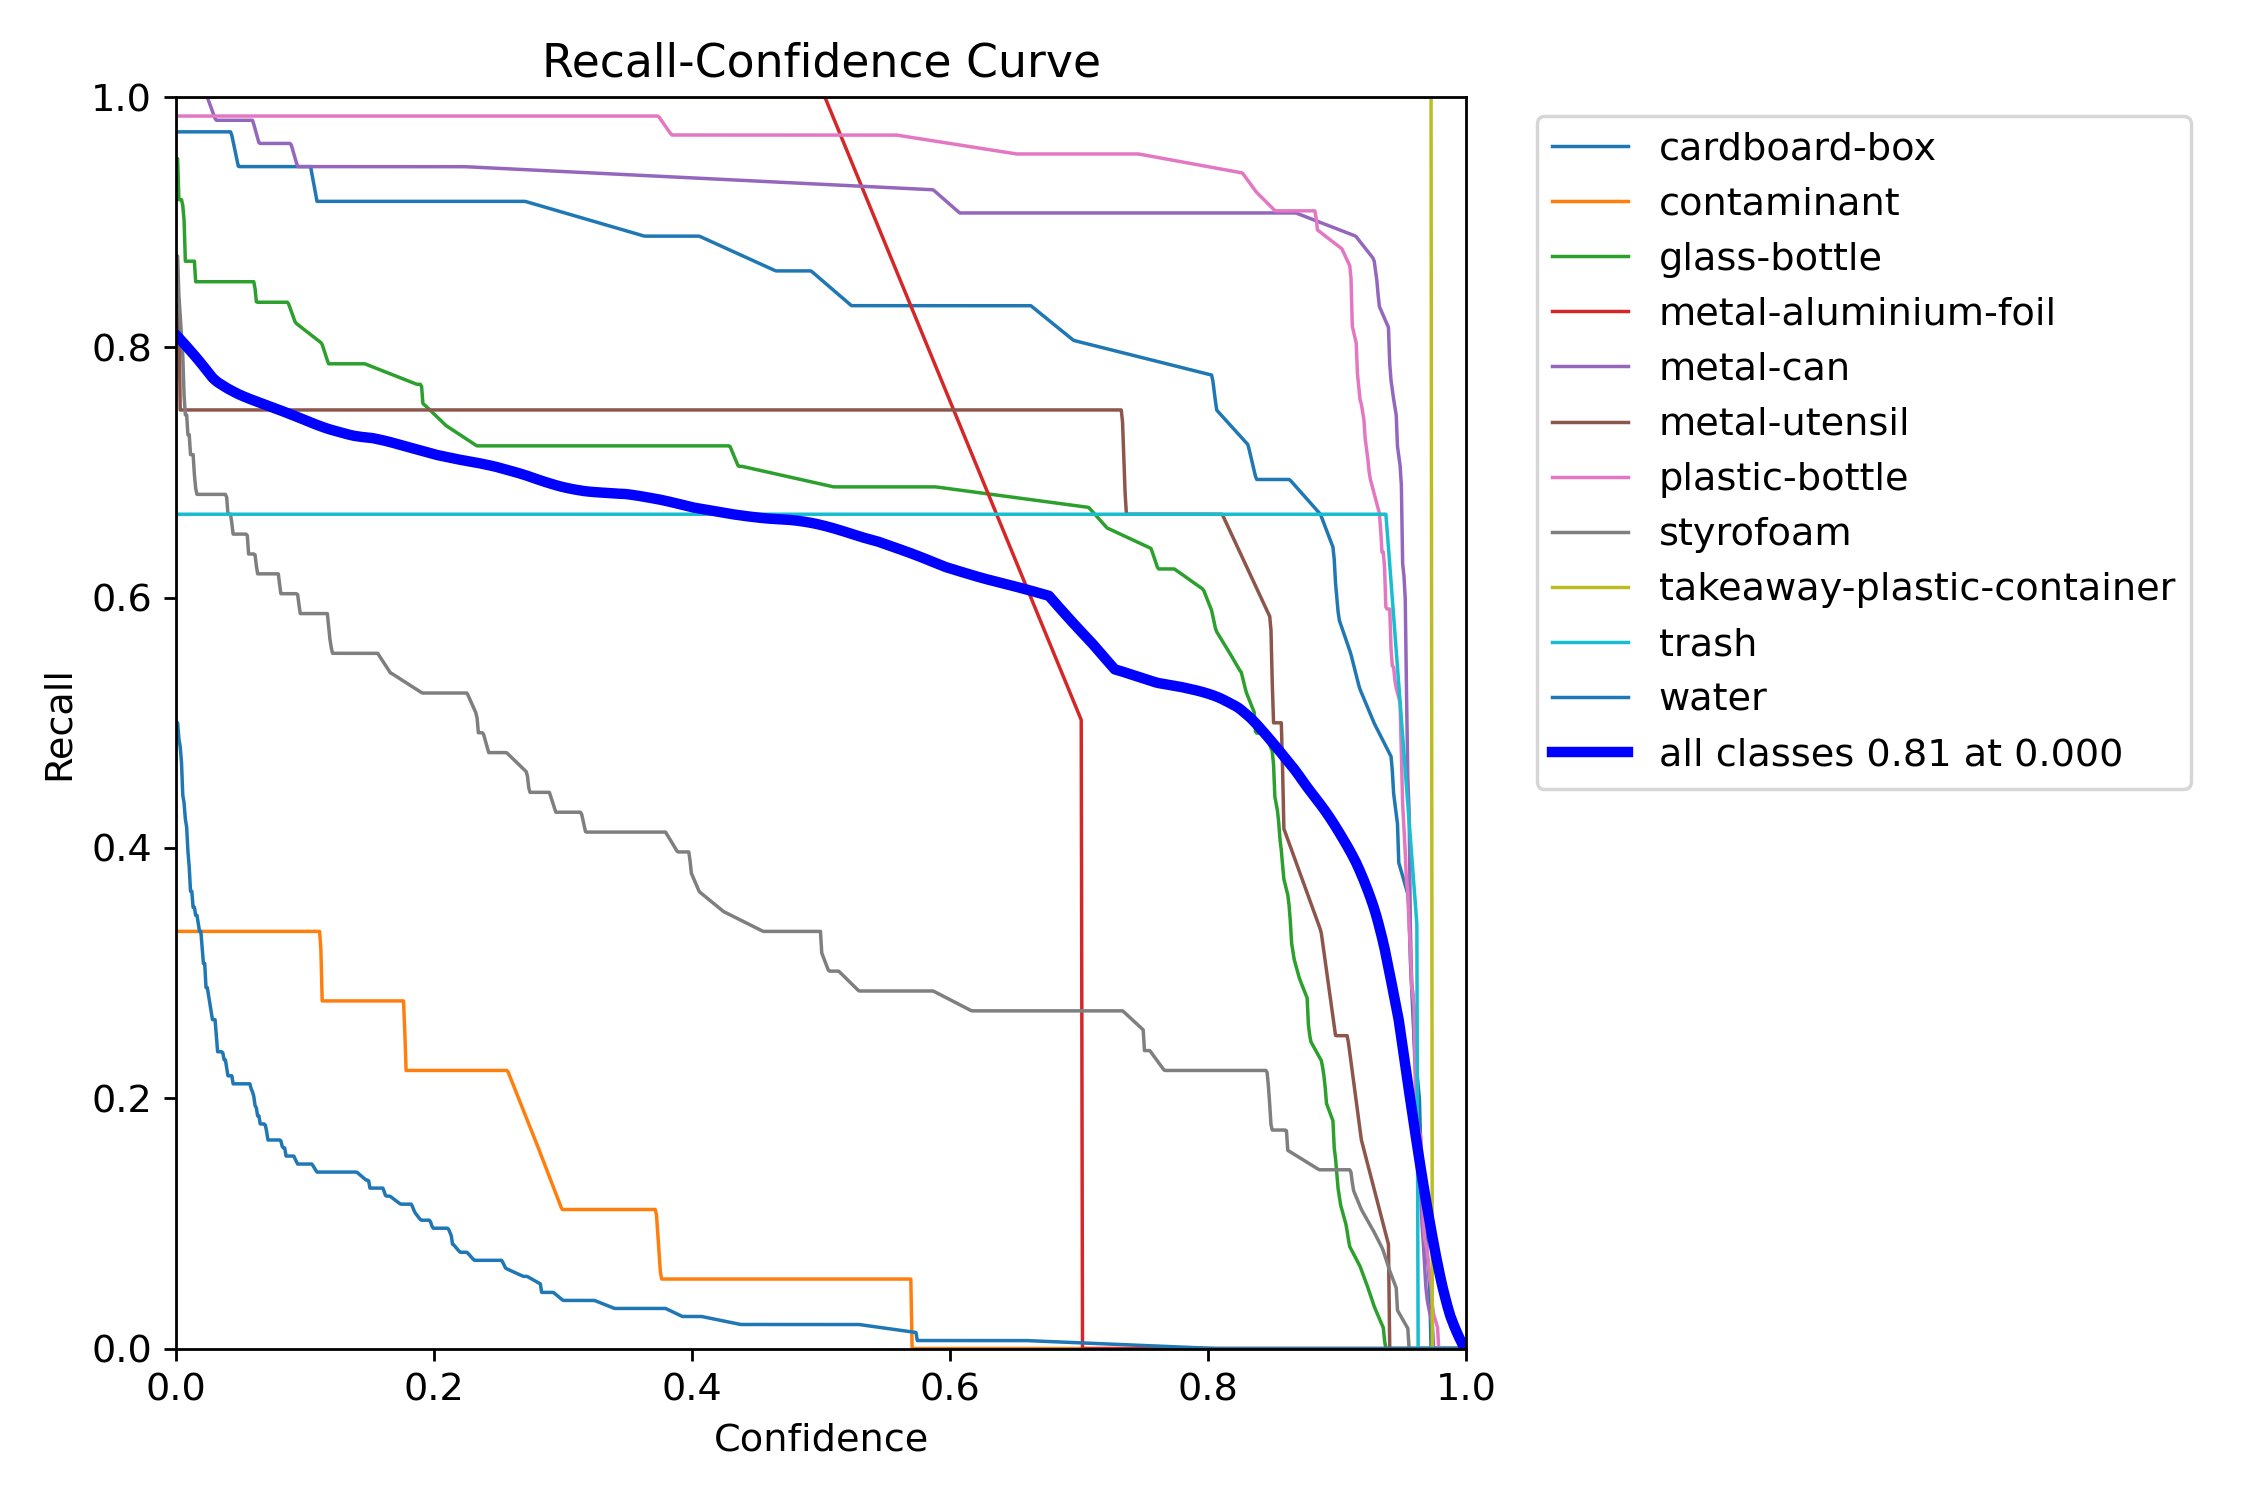

In [17]:
Image("/content/runs/segment/train/MaskR_curve.png")

In [18]:
model_trained = YOLO("/content/runs/segment/train/weights/best.pt")
results = model_trained.val()

print("Class indices with average precision:", results.ap_class_index)
print("Average precision for all classes:", results.box.all_ap)
print("Average precision:", results.box.ap)
print("Average precision at IoU=0.50:", results.box.ap50)
print("Class indices for average precision:", results.box.ap_class_index)
# print("Class-specific results:", results.box.class_result)
# print("Overall fitness score:", results.box.fitness)
# print("Precision curve:", results.box.p_curve)
# print("Precision values:", results.box.prec_values)
# print("Specific precision metrics:", results.box.px)

print("Mean precision:", results.box.mp)
print("Mean recall:", results.box.mr)
print("Precision:", results.box.p)
print("Recall:", results.box.r)
print("Recall curve:", results.box.r_curve)
print("F1 score:", results.box.f1)
print("F1 score curve:", results.box.f1_curve)

print("(B) Mean average precision map50-95:", results.box.map)
print("(B) Mean average precision at IoU=0.50:", results.box.map50)
print("(B) Mean average precision at IoU=0.75:", results.box.map75)
print("(B) Mean average precision for different IoU thresholds (a list contains map50-95(B) of each category):", results.box.maps)
print("(B) Mean results for different metrics:", results.box.mean_results)

print("(M) Mean average precision map50-95:", results.seg.map)
print("(M) Mean average precision at IoU=0.50:", results.seg.map50)
print("(M) Mean average precision at IoU=0.75:", results.seg.map75)
print("(M) Mean average precision for different IoU thresholds (a list contains map50-95(B) of each category):", results.seg.maps)
print("(M) Mean results for different metrics:", results.seg.mean_results)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,072,234 parameters, 0 gradients, 35.3 GFLOPs


val: Scanning /content/CSC3101_Bloobin_Dataset-3/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:02,  1.79it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.07it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


                   all         70        472       0.83      0.682      0.744      0.671      0.783      0.665      0.711      0.604
         cardboard-box         18         36      0.944      0.861      0.958       0.82      0.939      0.862      0.958      0.786
           contaminant          3         18          1     0.0834      0.237      0.121          1     0.0852      0.192     0.0971
          glass-bottle         14         61      0.876      0.696      0.832      0.623      0.876      0.698      0.815      0.582
  metal-aluminium-foil          2          2       0.97          1      0.995      0.995      0.965          1      0.995      0.995
             metal-can         20         54      0.962      0.932      0.985      0.966      0.962      0.932      0.985      0.948
         metal-utensil          3         12      0.654      0.917      0.915      0.846      0.534       0.75      0.682      0.401
        plastic-bottle         26         66      0.901      0.985   

# 5 Inference

In [19]:
model_trained = YOLO("/content/runs/segment/train/weights/best.pt")

model_trained.predict("/content/CSC3101_Bloobin_Dataset-3/valid/images/plasticd123_jpeg.rf.23bc23995a6d569e4cc563a6f5ba4e1b.jpg", save=True)


image 1/1 /content/CSC3101_Bloobin_Dataset-3/valid/images/plasticd123_jpeg.rf.23bc23995a6d569e4cc563a6f5ba4e1b.jpg: 640x384 1 plastic-bottle, 5 waters, 80.9ms
Speed: 1.4ms preprocess, 80.9ms inference, 18.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'cardboard-box', 1: 'contaminant', 2: 'glass-bottle', 3: 'metal-aluminium-foil', 4: 'metal-can', 5: 'metal-utensil', 6: 'paper-package', 7: 'plastic-bottle', 8: 'plastic-cap', 9: 'silicone-funnel', 10: 'styrofoam', 11: 'takeaway-plastic-container', 12: 'trash', 13: 'water'}
 obb: None
 orig_img: array([[[103, 104, 100],
         [103, 104, 100],
         [103, 104, 100],
         ...,
         [111, 114, 112],
         [111, 114, 112],
         [111, 114, 112]],
 
        [[103, 104, 100],
         [103, 104, 100],
         [103, 104, 100],
         ...,
         [111, 114, 112],
         [111, 114, 112],
         [111, 114, 112]],
 
        [[103, 104, 100],
         [103, 104, 100],
         [103, 104, 100],
         ...,
         [111, 114, 112],
         [111, 114, 112],
         [111, 114, 112]],


# 6 Export

In [20]:
import shutil
from google.colab import files

ds_folder_path = '/content/CSC3101_Bloobin_Dataset-3'
train_result_folder_path = '/content/runs'

shutil.make_archive(ds_folder_path, 'zip', ds_folder_path)
shutil.make_archive(train_result_folder_path, 'zip', train_result_folder_path)

files.download(f"{ds_folder_path}.zip")
files.download(f"{train_result_folder_path}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>